In [1297]:
import pandas as pd
import numpy as np

cleaned_reviews = "air_nz_cleaned_data.csv"
reviews_df = pd.read_csv(cleaned_reviews)

reviews_df

,date,header,rating,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,wifi_&_connectivity,value_for_money,recommended,aircraft,verified_status,review_content
0,2024-09-15,Service was so good,10,Business,Economy Class,Melbourne to Tokyo,August 2024,5.0,5.0,5.0,5.0,5.0,5.0,5.0,True,NaN,False,Such a lovely experience! Service was so good ...
1,2024-09-12,a highly disappointing experience,4,Solo Leisure,Economy Class,Raratonga to Auckland via Taipei,August 2024,3.0,4.0,3.0,3.0,1.0,4.0,1.0,False,NaN,False,I recently had a highly disappointing experien...
2,2024-08-29,the legroom was huge,9,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,5.0,-1.0,5.0,4.0,5.0,True,A320,False,I was honestly quite surprised about Air New Z...
3,2024-08-19,getting worse by the day,3,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,-1.0,-1.0,5.0,-1.0,1.0,False,NaN,False,Air New Zealand domestic service is getting wo...
4,2024-08-13,never fly Air New Zealand again,1,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,-1.0,-1.0,1.0,-1.0,1.0,False,ATR-72,True,Air New Zealand bumped us off our flight on th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2013-05-12,Air New Zealand customer review,3,NaN,Economy Class,NaN,NaN,3.0,2.0,3.0,4.0,-1.0,-1.0,2.0,False,NaN,False,I have flown with Air New Zealand for several ...
746,2013-05-10,Air New Zealand customer review,10,NaN,Premium Economy,NaN,NaN,5.0,5.0,5.0,5.0,-1.0,-1.0,4.0,True,NaN,False,Flew Wellington-San Francisco (via Auckland). ...
747,2013-05-08,Air New Zealand customer review,9,NaN,Premium Economy,NaN,NaN,4.0,5.0,5.0,5.0,-1.0,-1.0,5.0,True,NaN,False,Flew Premium Economy from LAX to AKL on a 777-...
748,2013-05-06,Air New Zealand customer review,5,NaN,Economy Class,NaN,NaN,3.0,3.0,4.0,1.0,-1.0,-1.0,3.0,False,NaN,False,Adelaide to Auckland April 28 2013. Usual incr...


In [1298]:
reviews_df.columns

Index(['date', 'header', 'rating', 'type_of_traveller', 'seat_type', 'route',
       'date_flown', 'seat_comfort', 'cabin_staff_service', 'food_&_beverages',
       'inflight_entertainment', 'ground_service', 'wifi_&_connectivity',
       'value_for_money', 'recommended', 'aircraft', 'verified_status',
       'review_content'],
      dtype='object')

# What are the average ratings for specific service categories (e.g., seat comfort, cabin staff service, food & beverages, etc.)?

In [1299]:
rating_columns = ['seat_comfort', 'cabin_staff_service', 'food_&_beverages', 'ground_service','wifi_&_connectivity','value_for_money','inflight_entertainment']

# Average rating for each category
average_ratings_by_category = reviews_df[rating_columns].mean()
print("Average Ratings by Category:")
print(average_ratings_by_category)

Average Ratings by Category:
seat_comfort              2.937333
cabin_staff_service       3.165333
food_&_beverages          2.442667
ground_service            1.750667
wifi_&_connectivity      -0.181333
value_for_money           2.852000
inflight_entertainment    2.329333
dtype: float64


/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_926/3891546184.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=average_ratings_by_category.index, y=average_ratings_by_category.values, palette="viridis")


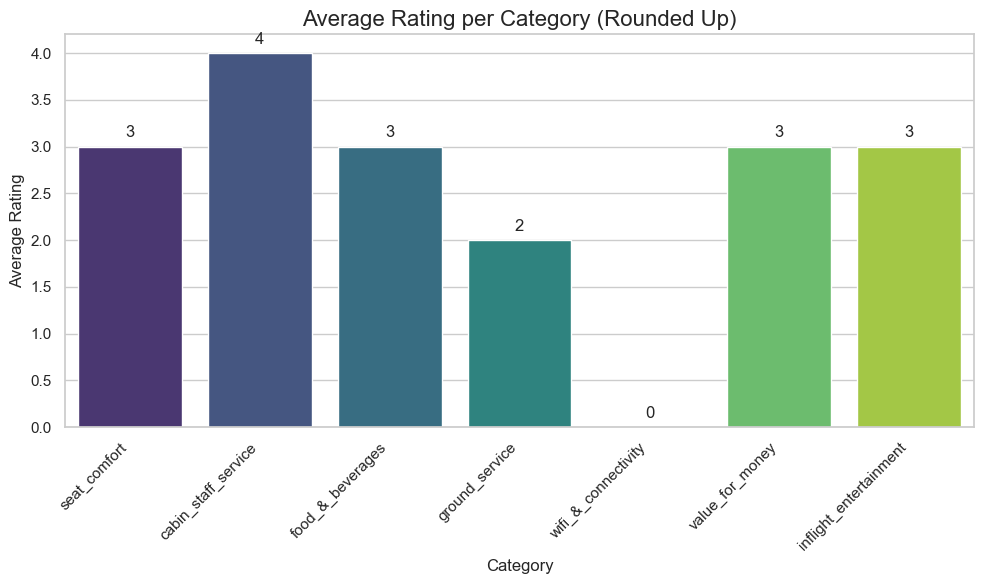

In [1300]:
import matplotlib.pyplot as plt
import seaborn as sns

# Round up aaverage rating per category
average_ratings_by_category = np.ceil(reviews_df[rating_columns].mean())

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=average_ratings_by_category.index, y=average_ratings_by_category.values, palette="viridis")

plt.title("Average Rating per Category (Rounded Up)", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xticks(rotation=45, ha='right')

for i in range(len(average_ratings_by_category)):
    bar_plot.text(i, average_ratings_by_category.values[i] + 0.1, str(int(average_ratings_by_category.values[i])), 
                  ha='center', fontsize=12)

plt.tight_layout()
plt.show()


# What is the average overall rating of Air New Zealand based on customer reviews?

In [1301]:
# Ratings converted to numeric if they are in string format
reviews_df['rating'] = pd.to_numeric(reviews_df['rating'], errors='coerce')

# Overall average rating
average_rating = reviews_df['rating'].mean()
print(f"Average Rating: {average_rating:.2f}")

Average Rating: 5.22


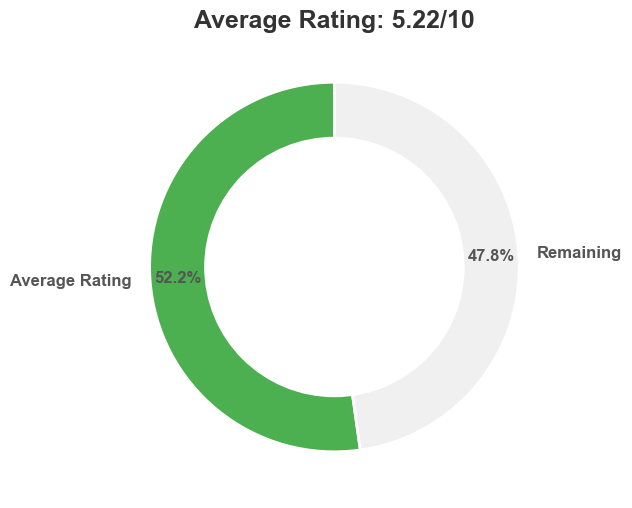

In [1302]:
labels = ['Average Rating', 'Remaining']
sizes = [average_rating, 10 - average_rating]
colors = ['#4caf50', '#f0f0f0']  

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%',
       pctdistance=0.85, wedgeprops={'edgecolor': 'white', 'linewidth': 2})

centre_circle = plt.Circle((0, 0), 0.70, fc='white', linewidth=1.25)
ax.add_artist(centre_circle)

plt.title(f'Average Rating: {average_rating:.2f}/10', fontsize=18, color='#333', fontweight='bold')
plt.setp(ax.texts, fontweight='bold', color='#555', fontsize=12)
plt.show()


# How do missing WiFi & Connectivity Ratings affect the overall average rating?

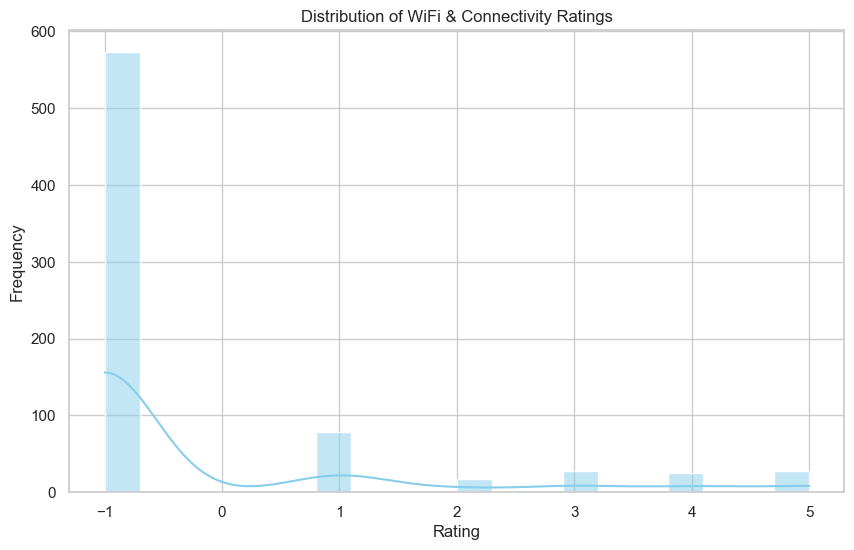

In [1303]:
# Plot distribution of 'wifi_&_connectivity' ratings
plt.figure(figsize=(10, 6))
sns.histplot(reviews_df['wifi_&_connectivity'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of WiFi & Connectivity Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [1304]:
# Count of -1.0 values in 'wifi_&_connectivity'
negative_count = (reviews_df['wifi_&_connectivity'] == -1.0).sum()
total_count = len(reviews_df)
print(f"Number of -1.0 ratings: {negative_count}")
print(f"Total number of ratings: {total_count}")


Number of -1.0 ratings: 573
Total number of ratings: 750


In [1305]:
# Filter out -1.0 values and calculate the mean
valid_wifi_ratings = reviews_df[reviews_df['wifi_&_connectivity'] != -1.0]['wifi_&_connectivity']
average_valid_wifi_rating = valid_wifi_ratings.mean()

print(f"Average WiFi & Connectivity Rating (excluding -1.0): {average_valid_wifi_rating}")


Average WiFi & Connectivity Rating (excluding -1.0): 2.468926553672316


/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_926/3117925003.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ratings_comparison.index, y=average_ratings_comparison.values, palette="viridis")


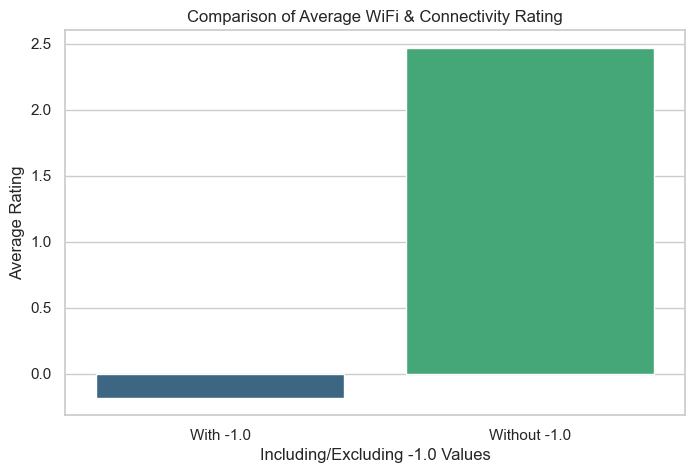

In [1306]:
# Data for comparison
average_ratings_comparison = pd.Series({
    'With -1.0': reviews_df['wifi_&_connectivity'].mean(),
    'Without -1.0': average_valid_wifi_rating
})

plt.figure(figsize=(8, 5))
sns.barplot(x=average_ratings_comparison.index, y=average_ratings_comparison.values, palette="viridis")
plt.title("Comparison of Average WiFi & Connectivity Rating")
plt.xlabel("Including/Excluding -1.0 Values")
plt.ylabel("Average Rating")
plt.show()


# What is the overall sentiment distribution of the reviews?

In [1307]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, classification_report

In [1308]:
reviews_df = pd.read_csv('air_nz_cleaned_data.csv')

# Check for and handle missing values
reviews_df.dropna(subset=['review_content'], inplace=True)

reviews_df

,date,header,rating,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,wifi_&_connectivity,value_for_money,recommended,aircraft,verified_status,review_content
0,2024-09-15,Service was so good,10,Business,Economy Class,Melbourne to Tokyo,August 2024,5.0,5.0,5.0,5.0,5.0,5.0,5.0,True,NaN,False,Such a lovely experience! Service was so good ...
1,2024-09-12,a highly disappointing experience,4,Solo Leisure,Economy Class,Raratonga to Auckland via Taipei,August 2024,3.0,4.0,3.0,3.0,1.0,4.0,1.0,False,NaN,False,I recently had a highly disappointing experien...
2,2024-08-29,the legroom was huge,9,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,5.0,-1.0,5.0,4.0,5.0,True,A320,False,I was honestly quite surprised about Air New Z...
3,2024-08-19,getting worse by the day,3,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,-1.0,-1.0,5.0,-1.0,1.0,False,NaN,False,Air New Zealand domestic service is getting wo...
4,2024-08-13,never fly Air New Zealand again,1,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,-1.0,-1.0,1.0,-1.0,1.0,False,ATR-72,True,Air New Zealand bumped us off our flight on th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2013-05-12,Air New Zealand customer review,3,NaN,Economy Class,NaN,NaN,3.0,2.0,3.0,4.0,-1.0,-1.0,2.0,False,NaN,False,I have flown with Air New Zealand for several ...
746,2013-05-10,Air New Zealand customer review,10,NaN,Premium Economy,NaN,NaN,5.0,5.0,5.0,5.0,-1.0,-1.0,4.0,True,NaN,False,Flew Wellington-San Francisco (via Auckland). ...
747,2013-05-08,Air New Zealand customer review,9,NaN,Premium Economy,NaN,NaN,4.0,5.0,5.0,5.0,-1.0,-1.0,5.0,True,NaN,False,Flew Premium Economy from LAX to AKL on a 777-...
748,2013-05-06,Air New Zealand customer review,5,NaN,Economy Class,NaN,NaN,3.0,3.0,4.0,1.0,-1.0,-1.0,3.0,False,NaN,False,Adelaide to Auckland April 28 2013. Usual incr...


In [1309]:
# Text cleaning function
def clean_text(text):
    # Preserve exclamations, question marks, and retain original casing
    # Remove unwanted characters but keep punctuation marks important for sentiment
    text = re.sub(r'[^a-zA-Z0-9\s!?.]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply text cleaning
reviews_df['combined_content'] = reviews_df['header'] + ' ' + reviews_df['review_content'].apply(clean_text)
reviews_df

,date,header,rating,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,wifi_&_connectivity,value_for_money,recommended,aircraft,verified_status,review_content,combined_content
0,2024-09-15,Service was so good,10,Business,Economy Class,Melbourne to Tokyo,August 2024,5.0,5.0,5.0,5.0,5.0,5.0,5.0,True,NaN,False,Such a lovely experience! Service was so good ...,Service was so good Such a lovely experience! ...
1,2024-09-12,a highly disappointing experience,4,Solo Leisure,Economy Class,Raratonga to Auckland via Taipei,August 2024,3.0,4.0,3.0,3.0,1.0,4.0,1.0,False,NaN,False,I recently had a highly disappointing experien...,a highly disappointing experience I recently h...
2,2024-08-29,the legroom was huge,9,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,5.0,-1.0,5.0,4.0,5.0,True,A320,False,I was honestly quite surprised about Air New Z...,the legroom was huge I was honestly quite surp...
3,2024-08-19,getting worse by the day,3,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,-1.0,-1.0,5.0,-1.0,1.0,False,NaN,False,Air New Zealand domestic service is getting wo...,getting worse by the day Air New Zealand domes...
4,2024-08-13,never fly Air New Zealand again,1,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,-1.0,-1.0,1.0,-1.0,1.0,False,ATR-72,True,Air New Zealand bumped us off our flight on th...,never fly Air New Zealand again Air New Zealan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2013-05-12,Air New Zealand customer review,3,NaN,Economy Class,NaN,NaN,3.0,2.0,3.0,4.0,-1.0,-1.0,2.0,False,NaN,False,I have flown with Air New Zealand for several ...,Air New Zealand customer review I have flown w...
746,2013-05-10,Air New Zealand customer review,10,NaN,Premium Economy,NaN,NaN,5.0,5.0,5.0,5.0,-1.0,-1.0,4.0,True,NaN,False,Flew Wellington-San Francisco (via Auckland). ...,Air New Zealand customer review Flew Wellingto...
747,2013-05-08,Air New Zealand customer review,9,NaN,Premium Economy,NaN,NaN,4.0,5.0,5.0,5.0,-1.0,-1.0,5.0,True,NaN,False,Flew Premium Economy from LAX to AKL on a 777-...,Air New Zealand customer review Flew Premium E...
748,2013-05-06,Air New Zealand customer review,5,NaN,Economy Class,NaN,NaN,3.0,3.0,4.0,1.0,-1.0,-1.0,3.0,False,NaN,False,Adelaide to Auckland April 28 2013. Usual incr...,Air New Zealand customer review Adelaide to Au...


In [1310]:
# Define sentiment analysis functions
def get_sentiment_textblob(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis using TextBlob
reviews_df['textblob_sentiment'] = reviews_df['combined_content'].apply(get_sentiment_textblob)
reviews_df

,date,header,rating,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,wifi_&_connectivity,value_for_money,recommended,aircraft,verified_status,review_content,combined_content,textblob_sentiment
0,2024-09-15,Service was so good,10,Business,Economy Class,Melbourne to Tokyo,August 2024,5.0,5.0,5.0,5.0,5.0,5.0,5.0,True,NaN,False,Such a lovely experience! Service was so good ...,Service was so good Such a lovely experience! ...,Positive
1,2024-09-12,a highly disappointing experience,4,Solo Leisure,Economy Class,Raratonga to Auckland via Taipei,August 2024,3.0,4.0,3.0,3.0,1.0,4.0,1.0,False,NaN,False,I recently had a highly disappointing experien...,a highly disappointing experience I recently h...,Negative
2,2024-08-29,the legroom was huge,9,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,5.0,-1.0,5.0,4.0,5.0,True,A320,False,I was honestly quite surprised about Air New Z...,the legroom was huge I was honestly quite surp...,Positive
3,2024-08-19,getting worse by the day,3,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,-1.0,-1.0,5.0,-1.0,1.0,False,NaN,False,Air New Zealand domestic service is getting wo...,getting worse by the day Air New Zealand domes...,Negative
4,2024-08-13,never fly Air New Zealand again,1,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,-1.0,-1.0,1.0,-1.0,1.0,False,ATR-72,True,Air New Zealand bumped us off our flight on th...,never fly Air New Zealand again Air New Zealan...,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2013-05-12,Air New Zealand customer review,3,NaN,Economy Class,NaN,NaN,3.0,2.0,3.0,4.0,-1.0,-1.0,2.0,False,NaN,False,I have flown with Air New Zealand for several ...,Air New Zealand customer review I have flown w...,Positive
746,2013-05-10,Air New Zealand customer review,10,NaN,Premium Economy,NaN,NaN,5.0,5.0,5.0,5.0,-1.0,-1.0,4.0,True,NaN,False,Flew Wellington-San Francisco (via Auckland). ...,Air New Zealand customer review Flew Wellingto...,Positive
747,2013-05-08,Air New Zealand customer review,9,NaN,Premium Economy,NaN,NaN,4.0,5.0,5.0,5.0,-1.0,-1.0,5.0,True,NaN,False,Flew Premium Economy from LAX to AKL on a 777-...,Air New Zealand customer review Flew Premium E...,Positive
748,2013-05-06,Air New Zealand customer review,5,NaN,Economy Class,NaN,NaN,3.0,3.0,4.0,1.0,-1.0,-1.0,3.0,False,NaN,False,Adelaide to Auckland April 28 2013. Usual incr...,Air New Zealand customer review Adelaide to Au...,Positive


In [1311]:
# Calculate sentiment counts
sentiment_counts = reviews_df['textblob_sentiment'].value_counts()
sentiment_counts

textblob_sentiment
Positive    538
Negative    210
Neutral       2
Name: count, dtype: int64

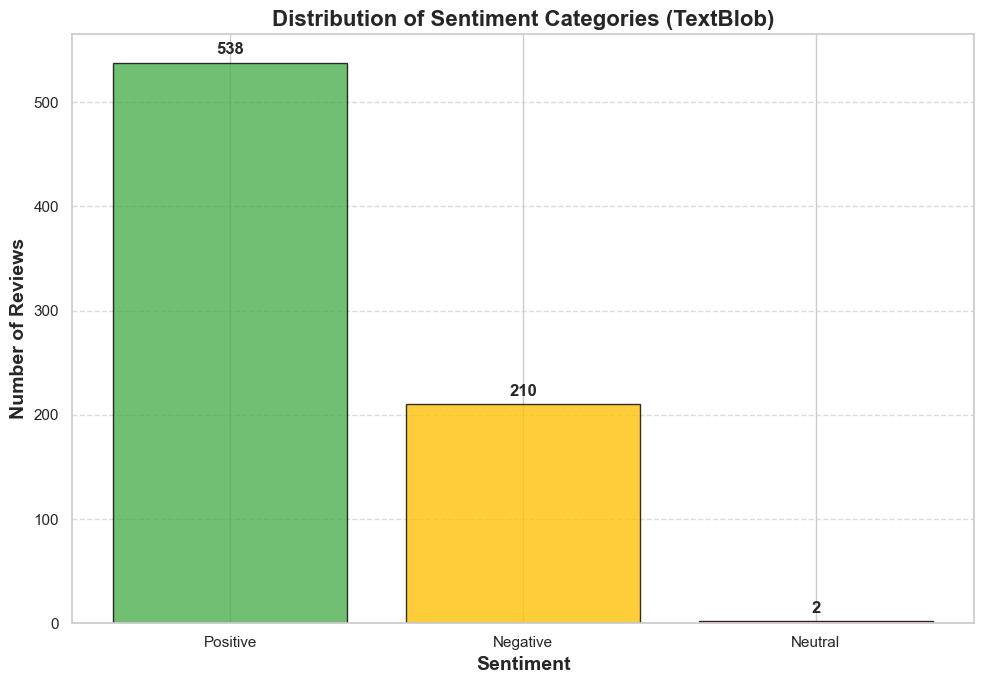

In [1312]:
# Plot sentiment distribution
plt.figure(figsize=(10, 7))
colors = ['#4CAF50', '#FFC107', '#F44336']  # Colors for Positive, Neutral, Negative
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors, edgecolor='black', alpha=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Sentiment', fontsize=14, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=14, fontweight='bold')
plt.title('Distribution of Sentiment Categories (TextBlob)', fontsize=16, fontweight='bold')
for i, count in enumerate(sentiment_counts.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [1313]:
def get_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()

    # Adjust lexicon with strong sentiment values
    analyzer.lexicon['amazing'] = 5.0   
    analyzer.lexicon['terrible'] = -5.0    
    analyzer.lexicon['great service'] = 5.0 
    analyzer.lexicon['terrible flight'] = -5.0
    analyzer.lexicon['friendly staff'] = 5.0
    analyzer.lexicon['bad experience'] = -5.0
    analyzer.lexicon['airline to avoid'] = -5.0
    analyzer.lexicon['worst airline'] = -5.0    
    analyzer.lexicon['do not recommend'] = -5.0  
    analyzer.lexicon['disappointing'] = -5.0   
    analyzer.lexicon['burned off any loyalty I felt'] = -5.0 
    analyzer.lexicon['never fly with Air New Zealand'] = -5.0   
    analyzer.lexicon['service gone out of the window'] = -5.0 
    analyzer.lexicon['general air of disinterest'] = -5.0    

    score = analyzer.polarity_scores(text)['compound']
    if score > 0.1:  
        return 'Positive'
    elif score < -0.1: 
        return 'Negative'
    else:
        return 'Neutral'


In [1314]:
# Apply sentiment analysis using VADER

reviews_df['vader_sentiment'] = reviews_df['combined_content'].apply(get_sentiment_vader)
reviews_df

,date,header,rating,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,...,ground_service,wifi_&_connectivity,value_for_money,recommended,aircraft,verified_status,review_content,combined_content,textblob_sentiment,vader_sentiment
0,2024-09-15,Service was so good,10,Business,Economy Class,Melbourne to Tokyo,August 2024,5.0,5.0,5.0,...,5.0,5.0,5.0,True,NaN,False,Such a lovely experience! Service was so good ...,Service was so good Such a lovely experience! ...,Positive,Positive
1,2024-09-12,a highly disappointing experience,4,Solo Leisure,Economy Class,Raratonga to Auckland via Taipei,August 2024,3.0,4.0,3.0,...,1.0,4.0,1.0,False,NaN,False,I recently had a highly disappointing experien...,a highly disappointing experience I recently h...,Negative,Negative
2,2024-08-29,the legroom was huge,9,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,5.0,...,5.0,4.0,5.0,True,A320,False,I was honestly quite surprised about Air New Z...,the legroom was huge I was honestly quite surp...,Positive,Positive
3,2024-08-19,getting worse by the day,3,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,-1.0,...,5.0,-1.0,1.0,False,NaN,False,Air New Zealand domestic service is getting wo...,getting worse by the day Air New Zealand domes...,Negative,Negative
4,2024-08-13,never fly Air New Zealand again,1,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,-1.0,...,1.0,-1.0,1.0,False,ATR-72,True,Air New Zealand bumped us off our flight on th...,never fly Air New Zealand again Air New Zealan...,Negative,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2013-05-12,Air New Zealand customer review,3,NaN,Economy Class,NaN,NaN,3.0,2.0,3.0,...,-1.0,-1.0,2.0,False,NaN,False,I have flown with Air New Zealand for several ...,Air New Zealand customer review I have flown w...,Positive,Positive
746,2013-05-10,Air New Zealand customer review,10,NaN,Premium Economy,NaN,NaN,5.0,5.0,5.0,...,-1.0,-1.0,4.0,True,NaN,False,Flew Wellington-San Francisco (via Auckland). ...,Air New Zealand customer review Flew Wellingto...,Positive,Positive
747,2013-05-08,Air New Zealand customer review,9,NaN,Premium Economy,NaN,NaN,4.0,5.0,5.0,...,-1.0,-1.0,5.0,True,NaN,False,Flew Premium Economy from LAX to AKL on a 777-...,Air New Zealand customer review Flew Premium E...,Positive,Positive
748,2013-05-06,Air New Zealand customer review,5,NaN,Economy Class,NaN,NaN,3.0,3.0,4.0,...,-1.0,-1.0,3.0,False,NaN,False,Adelaide to Auckland April 28 2013. Usual incr...,Air New Zealand customer review Adelaide to Au...,Positive,Positive


In [1315]:
# Calculate sentiment counts
vader_sentiment_counts = reviews_df['vader_sentiment'].value_counts()
vader_sentiment_counts

vader_sentiment
Positive    438
Negative    296
Neutral      16
Name: count, dtype: int64

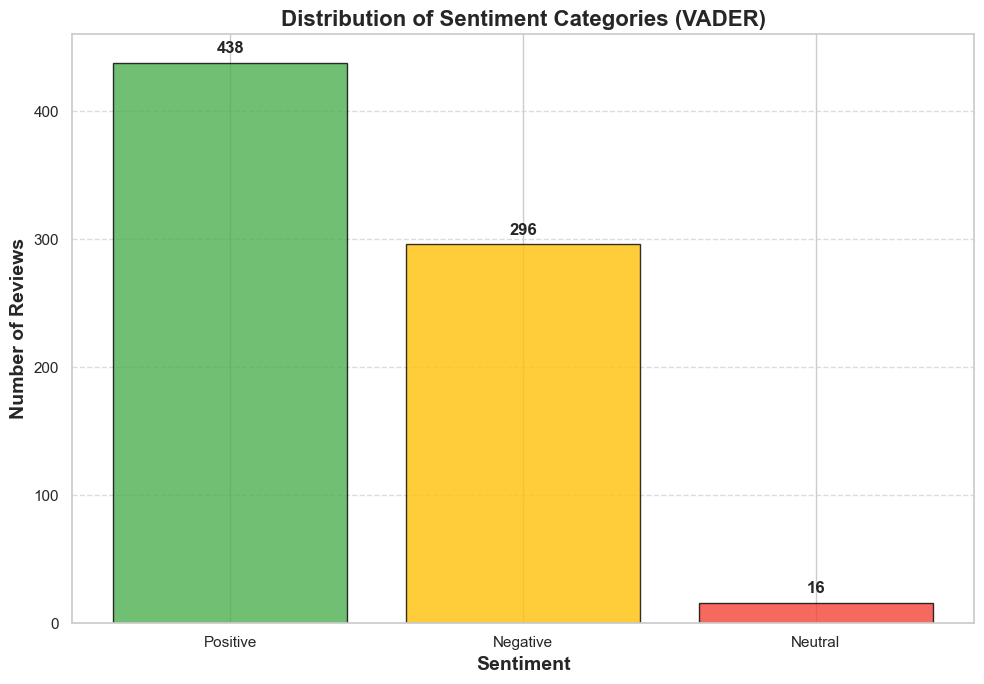

In [1316]:
# Plot sentiment distribution
plt.figure(figsize=(10, 7))
colors = ['#4CAF50', '#FFC107', '#F44336']  # Colors for Positive, Neutral, Negative
plt.bar(vader_sentiment_counts.index, vader_sentiment_counts.values, color=colors, edgecolor='black', alpha=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Sentiment', fontsize=14, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=14, fontweight='bold')
plt.title('Distribution of Sentiment Categories (VADER)', fontsize=16, fontweight='bold')
for i, count in enumerate(vader_sentiment_counts.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [1317]:
# Define function to map ratings to sentiment
def map_rating_to_sentiment(rating):
    if rating >= 8:
        return 'Positive'
    elif rating >= 4:
        return 'Neutral'
    else:
        return 'Negative'
    
# Apply rating to sentiment mapping
reviews_df['rating_sentiment'] = reviews_df['rating'].apply(map_rating_to_sentiment)
reviews_df

,date,header,rating,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,...,wifi_&_connectivity,value_for_money,recommended,aircraft,verified_status,review_content,combined_content,textblob_sentiment,vader_sentiment,rating_sentiment
0,2024-09-15,Service was so good,10,Business,Economy Class,Melbourne to Tokyo,August 2024,5.0,5.0,5.0,...,5.0,5.0,True,NaN,False,Such a lovely experience! Service was so good ...,Service was so good Such a lovely experience! ...,Positive,Positive,Positive
1,2024-09-12,a highly disappointing experience,4,Solo Leisure,Economy Class,Raratonga to Auckland via Taipei,August 2024,3.0,4.0,3.0,...,4.0,1.0,False,NaN,False,I recently had a highly disappointing experien...,a highly disappointing experience I recently h...,Negative,Negative,Neutral
2,2024-08-29,the legroom was huge,9,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,5.0,...,4.0,5.0,True,A320,False,I was honestly quite surprised about Air New Z...,the legroom was huge I was honestly quite surp...,Positive,Positive,Positive
3,2024-08-19,getting worse by the day,3,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,-1.0,...,-1.0,1.0,False,NaN,False,Air New Zealand domestic service is getting wo...,getting worse by the day Air New Zealand domes...,Negative,Negative,Negative
4,2024-08-13,never fly Air New Zealand again,1,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,-1.0,...,-1.0,1.0,False,ATR-72,True,Air New Zealand bumped us off our flight on th...,never fly Air New Zealand again Air New Zealan...,Negative,Negative,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2013-05-12,Air New Zealand customer review,3,NaN,Economy Class,NaN,NaN,3.0,2.0,3.0,...,-1.0,2.0,False,NaN,False,I have flown with Air New Zealand for several ...,Air New Zealand customer review I have flown w...,Positive,Positive,Negative
746,2013-05-10,Air New Zealand customer review,10,NaN,Premium Economy,NaN,NaN,5.0,5.0,5.0,...,-1.0,4.0,True,NaN,False,Flew Wellington-San Francisco (via Auckland). ...,Air New Zealand customer review Flew Wellingto...,Positive,Positive,Positive
747,2013-05-08,Air New Zealand customer review,9,NaN,Premium Economy,NaN,NaN,4.0,5.0,5.0,...,-1.0,5.0,True,NaN,False,Flew Premium Economy from LAX to AKL on a 777-...,Air New Zealand customer review Flew Premium E...,Positive,Positive,Positive
748,2013-05-06,Air New Zealand customer review,5,NaN,Economy Class,NaN,NaN,3.0,3.0,4.0,...,-1.0,3.0,False,NaN,False,Adelaide to Auckland April 28 2013. Usual incr...,Air New Zealand customer review Adelaide to Au...,Positive,Positive,Neutral


In [1318]:
# Sample reviews for each sentiment type
def sample_reviews(df, sentiment, n=2):
    return df[df['textblob_sentiment'] == sentiment].sample(n=n)

# Sample 2 reviews for each sentiment type
positive_samples = sample_reviews(reviews_df, 'Positive')
neutral_samples = sample_reviews(reviews_df, 'Neutral')
negative_samples = sample_reviews(reviews_df, 'Negative')

In [1319]:
# Combine samples into one DataFrame for easier inspection
sampled_reviews = pd.concat([positive_samples, neutral_samples, negative_samples])

# Display sampled reviews with TextBlob and VADER sentiment labels
print("Sampled Reviews for Sentiment Analysis:")
print(sampled_reviews[['header', 'review_content', 'textblob_sentiment', 'vader_sentiment']])

# Save results to CSV for inspection
reviews_df[['header', 'review_content', 'rating', 'rating_sentiment', 'vader_sentiment', 'textblob_sentiment']].to_csv('sentiment_comparison.csv', index=False)
print("Results saved to 'sentiment_comparison.csv'.")

Sampled Reviews for Sentiment Analysis:
                                       header  \
494                    well worth the expense   
142                 Very good service service   
163          I want to know why this happened   
59   no response to the reimbursement request   
243                         Very poor service   
18           suggest avoiding Air New Zealand   

                                        review_content textblob_sentiment  \
494  Paid for upgrade to premium economy which was ...           Positive   
142  Very good service service, sandy Cornish was o...           Positive   
163  I paid the works for my daughter when I booked...            Neutral   
59                                        Not Verified            Neutral   
243  Melbourne to Queenstown. Very poor service. Po...           Negative   
18   I had a concerning experience with Air New Zea...           Negative   

    vader_sentiment  
494        Positive  
142        Positive  
163       

In [1320]:
# Calculate confusion matrix and classification report for VADER
y_true = reviews_df['rating_sentiment']
y_pred_vader = reviews_df['vader_sentiment']

conf_matrix_vader = confusion_matrix(y_true, y_pred_vader, labels=['Positive', 'Neutral', 'Negative'])
class_report_vader = classification_report(y_true, y_pred_vader, labels=['Positive', 'Neutral', 'Negative'])

print("Confusion Matrix for VADER:")
print(conf_matrix_vader)
print("\nClassification Report for VADER:")
print(class_report_vader)

Confusion Matrix for VADER:
[[265   2   3]
 [100   4  55]
 [ 73  10 238]]

Classification Report for VADER:
              precision    recall  f1-score   support

    Positive       0.61      0.98      0.75       270
     Neutral       0.25      0.03      0.05       159
    Negative       0.80      0.74      0.77       321

    accuracy                           0.68       750
   macro avg       0.55      0.58      0.52       750
weighted avg       0.61      0.68      0.61       750



In [1321]:
# Calculate confusion matrix and classification report for TextBlob
y_pred_textblob = reviews_df['textblob_sentiment']

conf_matrix_textblob = confusion_matrix(y_true, y_pred_textblob, labels=['Positive', 'Neutral', 'Negative'])
class_report_textblob = classification_report(y_true, y_pred_textblob, labels=['Positive', 'Neutral', 'Negative'])

print("Confusion Matrix for TextBlob:")
print(conf_matrix_textblob)
print("\nClassification Report for TextBlob:")
print(class_report_textblob)

Confusion Matrix for TextBlob:
[[267   0   3]
 [133   0  26]
 [138   2 181]]

Classification Report for TextBlob:
              precision    recall  f1-score   support

    Positive       0.50      0.99      0.66       270
     Neutral       0.00      0.00      0.00       159
    Negative       0.86      0.56      0.68       321

    accuracy                           0.60       750
   macro avg       0.45      0.52      0.45       750
weighted avg       0.55      0.60      0.53       750



Results saved to 'sentiment_comparison.csv'.


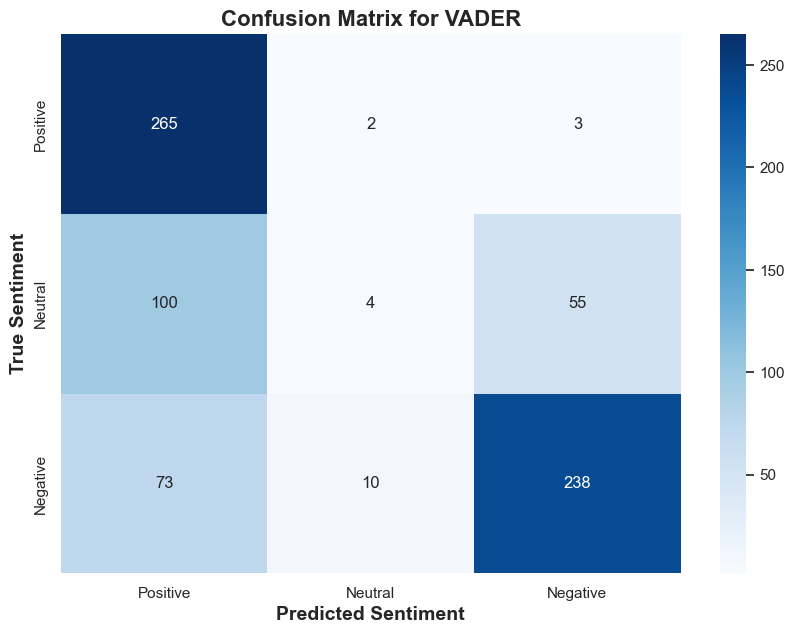

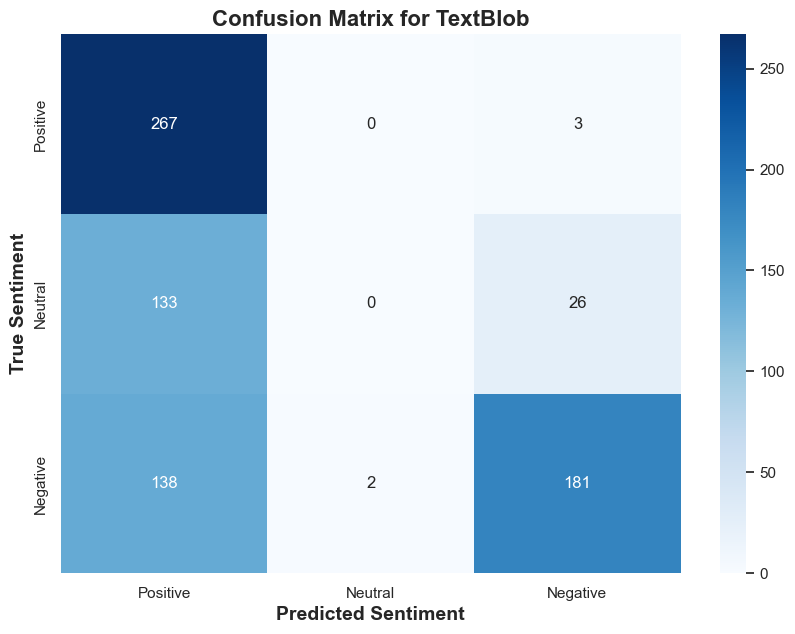

In [1322]:
# Save results to CSV for inspection
reviews_df[['review_content', 'rating', 'rating_sentiment', 'vader_sentiment', 'textblob_sentiment']].to_csv('sentiment_comparison.csv', index=False)
print("Results saved to 'sentiment_comparison.csv'.")

# Plot confusion matrices
def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Sentiment', fontsize=14, fontweight='bold')
    plt.ylabel('True Sentiment', fontsize=14, fontweight='bold')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.show()

plot_confusion_matrix(conf_matrix_vader, labels=['Positive', 'Neutral', 'Negative'], title='Confusion Matrix for VADER')
plot_confusion_matrix(conf_matrix_textblob, labels=['Positive', 'Neutral', 'Negative'], title='Confusion Matrix for TextBlob')

In [1323]:
# Calculate accuracies
def calculate_accuracy(df, sentiment_col):
    return (df['rating_sentiment'] == df[sentiment_col]).mean()

vader_accuracy = calculate_accuracy(reviews_df, 'vader_sentiment')
textblob_accuracy = calculate_accuracy(reviews_df, 'textblob_sentiment')

print(f"VADER Accuracy: {vader_accuracy:.2f}")
print(f"TextBlob Accuracy: {textblob_accuracy:.2f}")


VADER Accuracy: 0.68
TextBlob Accuracy: 0.60


/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_926/1864585545.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tool', y='Accuracy', data=accuracy_df, palette='viridis')


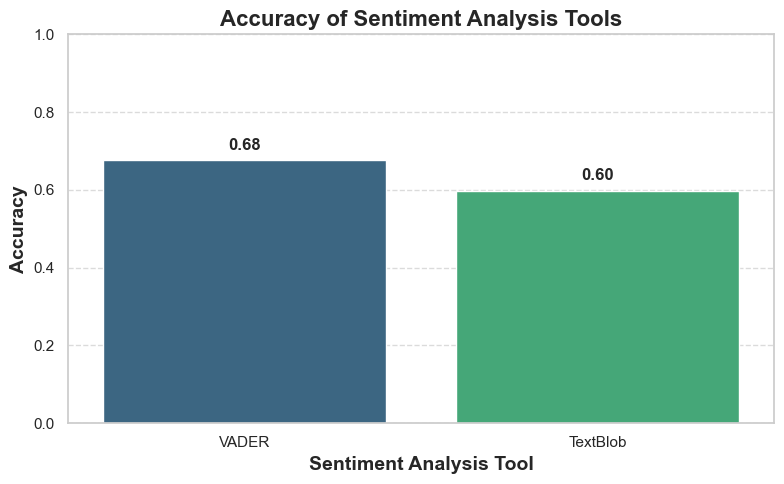

In [1324]:
accuracy_df = pd.DataFrame({
    'Tool': ['VADER', 'TextBlob'],
    'Accuracy': [vader_accuracy, textblob_accuracy]
})


plt.figure(figsize=(8, 5))
sns.barplot(x='Tool', y='Accuracy', data=accuracy_df, palette='viridis')
plt.ylim(0, 1)  
plt.xlabel('Sentiment Analysis Tool', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.title('Accuracy of Sentiment Analysis Tools', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)


for index, value in enumerate(accuracy_df['Accuracy']):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [1325]:
# Convert 'date' to datetime and extract the year
reviews_df['year'] = pd.to_datetime(reviews_df['date'], format='%Y-%m-%d').dt.year

# Number of reviews aggregated by year and sentiment
sentiment_by_year = reviews_df.groupby(['year', 'vader_sentiment']).size().unstack(fill_value=0)

sentiment_by_year

vader_sentiment,Negative,Neutral,Positive
year,,,
2013,17,2,57
2014,20,1,64
2015,16,1,52
2016,17,0,57
2017,19,2,49
2018,32,2,44
2019,51,1,29
2020,27,3,15
2021,15,1,9


In [1326]:
reviews_df.to_csv("reviews_with_sentiments.csv", index=False)

# How do domestic & international routes compare in terms of review ratings?

In [1327]:
import pandas as pd

cleaned_reviews = "reviews_with_sentiments.csv"
reviews_df = pd.read_csv(cleaned_reviews)

reviews_df.head()


,date,header,rating,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,...,value_for_money,recommended,aircraft,verified_status,review_content,combined_content,textblob_sentiment,vader_sentiment,rating_sentiment,year
0,2024-09-15,Service was so good,10,Business,Economy Class,Melbourne to Tokyo,August 2024,5.0,5.0,5.0,...,5.0,True,NaN,False,Such a lovely experience! Service was so good ...,Service was so good Such a lovely experience! ...,Positive,Positive,Positive,2024
1,2024-09-12,a highly disappointing experience,4,Solo Leisure,Economy Class,Raratonga to Auckland via Taipei,August 2024,3.0,4.0,3.0,...,1.0,False,NaN,False,I recently had a highly disappointing experien...,a highly disappointing experience I recently h...,Negative,Negative,Neutral,2024
2,2024-08-29,the legroom was huge,9,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,5.0,...,5.0,True,A320,False,I was honestly quite surprised about Air New Z...,the legroom was huge I was honestly quite surp...,Positive,Positive,Positive,2024
3,2024-08-19,getting worse by the day,3,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,-1.0,...,1.0,False,NaN,False,Air New Zealand domestic service is getting wo...,getting worse by the day Air New Zealand domes...,Negative,Negative,Negative,2024
4,2024-08-13,never fly Air New Zealand again,1,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,-1.0,...,1.0,False,ATR-72,True,Air New Zealand bumped us off our flight on th...,never fly Air New Zealand again Air New Zealan...,Negative,Negative,Negative,2024


In [1328]:
# Function to split the route into departure, arrival, and via
def split_route(route):
    # Check if the route is not NaN (missing value)
    if pd.isna(route):
        return pd.Series([None, None, None])
    
    # Split by "to" first
    if 'to' in route:
        departure, arrival_part = route.split(' to ', 1)
        
        # Check if "via" is present in the arrival part
        if 'via' in arrival_part:
            arrival, via = arrival_part.split(' via ', 1)
            return pd.Series([departure.strip(), arrival.strip(), via.strip()])
        else:
            return pd.Series([departure.strip(), arrival_part.strip(), None])
    else:
        return pd.Series([None, None, None])

reviews_df[['departure', 'arrival', 'via']] = reviews_df['route'].apply(split_route)

reviews_df[['route', 'departure', 'arrival', 'via']].head()


,route,departure,arrival,via
0,Melbourne to Tokyo,Melbourne,Tokyo,None
1,Raratonga to Auckland via Taipei,Raratonga,Auckland,Taipei
2,Auckland to Queenstown,Auckland,Queenstown,None
3,Auckland to Napier,Auckland,Napier,None
4,Napier to Auckland,Napier,Auckland,None


In [1329]:
# Load the New Zealand airports dataset
nz_airports = "/Users/ainna/Documents/Coding Crusade with Ainna/air-new-zealand-customer-feedback-analysis/nz_airports.csv"
nz_airports_df = pd.read_csv(nz_airports)

nz_airports_df['Municipality'] = nz_airports_df['Municipality'].str.lower()
reviews_df['departure'] = reviews_df['departure'].str.lower()
reviews_df['arrival'] = reviews_df['arrival'].str.lower()

nz_airports_df[['Municipality', 'ISO_Country']].head()


,Municipality,ISO_Country
0,auckland,NZ
1,taupo,NZ
2,christchurch,NZ
3,te one,NZ
4,dunedin,NZ


In [1330]:
# Merge only departure first to test merging process
reviews_with_departure_country = reviews_df.merge(nz_airports_df[['Municipality', 'ISO_Country']], 
                                                  left_on='departure', 
                                                  right_on='Municipality', 
                                                  how='left')

# Rename the iso_country column to departure_country
reviews_with_departure_country = reviews_with_departure_country.rename(columns={'ISO_Country': 'departure_country'})

# Sample to verify
reviews_with_departure_country


,date,header,rating,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,...,combined_content,textblob_sentiment,vader_sentiment,rating_sentiment,year,departure,arrival,via,Municipality,departure_country
0,2024-09-15,Service was so good,10,Business,Economy Class,Melbourne to Tokyo,August 2024,5.0,5.0,5.0,...,Service was so good Such a lovely experience! ...,Positive,Positive,Positive,2024,melbourne,tokyo,None,NaN,NaN
1,2024-09-12,a highly disappointing experience,4,Solo Leisure,Economy Class,Raratonga to Auckland via Taipei,August 2024,3.0,4.0,3.0,...,a highly disappointing experience I recently h...,Negative,Negative,Neutral,2024,raratonga,auckland,Taipei,NaN,NaN
2,2024-08-29,the legroom was huge,9,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,5.0,...,the legroom was huge I was honestly quite surp...,Positive,Positive,Positive,2024,auckland,queenstown,None,auckland,NZ
3,2024-08-19,getting worse by the day,3,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,-1.0,...,getting worse by the day Air New Zealand domes...,Negative,Negative,Negative,2024,auckland,napier,None,auckland,NZ
4,2024-08-13,never fly Air New Zealand again,1,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,-1.0,...,never fly Air New Zealand again Air New Zealan...,Negative,Negative,Negative,2024,napier,auckland,None,napier,NZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,2013-05-06,Air New Zealand customer review,5,NaN,Economy Class,NaN,NaN,3.0,3.0,4.0,...,Air New Zealand customer review Adelaide to Au...,Positive,Positive,Neutral,2013,None,None,None,NaN,NZ
1310,2013-05-01,Air New Zealand customer review,5,NaN,Premium Economy,NaN,NaN,3.0,3.0,4.0,...,Air New Zealand customer review B747400 Premiu...,Positive,Positive,Neutral,2013,None,None,None,NaN,NZ
1311,2013-05-01,Air New Zealand customer review,5,NaN,Premium Economy,NaN,NaN,3.0,3.0,4.0,...,Air New Zealand customer review B747400 Premiu...,Positive,Positive,Neutral,2013,None,None,None,NaN,NZ
1312,2013-05-01,Air New Zealand customer review,5,NaN,Premium Economy,NaN,NaN,3.0,3.0,4.0,...,Air New Zealand customer review B747400 Premiu...,Positive,Positive,Neutral,2013,None,None,None,NaN,NZ


In [1331]:
# Now merge arrival country
reviews_with_full_country = reviews_with_departure_country.merge(nz_airports_df[['Municipality', 'ISO_Country']], 
                                                                 left_on='arrival', 
                                                                 right_on='Municipality', 
                                                                 how='left')

# Rename the iso_country column to arrival_country
reviews_with_full_country = reviews_with_full_country.rename(columns={'ISO_Country': 'arrival_country'})

# Verify the merge
print(reviews_with_full_country[['arrival', 'arrival_country']].head())


      arrival arrival_country
0       tokyo             NaN
1    auckland              NZ
2  queenstown              NZ
3      napier              NZ
4    auckland              NZ


In [1332]:
reviews_with_full_country['departure_country'] = reviews_with_full_country.apply(
    lambda row: row['departure_country'] if pd.notna(row['departure']) else None, axis=1
)
reviews_with_full_country['arrival_country'] = reviews_with_full_country.apply(
    lambda row: row['arrival_country'] if pd.notna(row['arrival']) else None, axis=1
)

reviews_with_full_country

,date,header,rating,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,...,vader_sentiment,rating_sentiment,year,departure,arrival,via,Municipality_x,departure_country,Municipality_y,arrival_country
0,2024-09-15,Service was so good,10,Business,Economy Class,Melbourne to Tokyo,August 2024,5.0,5.0,5.0,...,Positive,Positive,2024,melbourne,tokyo,None,NaN,NaN,NaN,NaN
1,2024-09-12,a highly disappointing experience,4,Solo Leisure,Economy Class,Raratonga to Auckland via Taipei,August 2024,3.0,4.0,3.0,...,Negative,Neutral,2024,raratonga,auckland,Taipei,NaN,NaN,auckland,NZ
2,2024-08-29,the legroom was huge,9,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,5.0,...,Positive,Positive,2024,auckland,queenstown,None,auckland,NZ,queenstown,NZ
3,2024-08-19,getting worse by the day,3,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,-1.0,...,Negative,Negative,2024,auckland,napier,None,auckland,NZ,napier,NZ
4,2024-08-13,never fly Air New Zealand again,1,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,-1.0,...,Negative,Negative,2024,napier,auckland,None,napier,NZ,auckland,NZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3565,2013-05-01,Air New Zealand customer review,5,NaN,Premium Economy,NaN,NaN,3.0,3.0,4.0,...,Positive,Neutral,2013,None,None,None,NaN,None,NaN,None
3566,2013-05-01,Air New Zealand customer review,5,NaN,Premium Economy,NaN,NaN,3.0,3.0,4.0,...,Positive,Neutral,2013,None,None,None,NaN,None,NaN,None
3567,2013-05-01,Air New Zealand customer review,5,NaN,Premium Economy,NaN,NaN,3.0,3.0,4.0,...,Positive,Neutral,2013,None,None,None,NaN,None,NaN,None
3568,2013-05-01,Air New Zealand customer review,5,NaN,Premium Economy,NaN,NaN,3.0,3.0,4.0,...,Positive,Neutral,2013,None,None,None,NaN,None,NaN,None


In [1333]:
duplicate_reviews = reviews_df[reviews_df.duplicated(subset=['review_content'], keep=False)]
print(duplicate_reviews)


Empty DataFrame
Columns: [date, header, rating, type_of_traveller, seat_type, route, date_flown, seat_comfort, cabin_staff_service, food_&_beverages, inflight_entertainment, ground_service, wifi_&_connectivity, value_for_money, recommended, aircraft, verified_status, review_content, combined_content, textblob_sentiment, vader_sentiment, rating_sentiment, year, departure, arrival, via]
Index: []

[0 rows x 26 columns]


In [1334]:
reviews_df = reviews_df.drop_duplicates(subset=['review_content']) 

reviews_df

,date,header,rating,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,...,verified_status,review_content,combined_content,textblob_sentiment,vader_sentiment,rating_sentiment,year,departure,arrival,via
0,2024-09-15,Service was so good,10,Business,Economy Class,Melbourne to Tokyo,August 2024,5.0,5.0,5.0,...,False,Such a lovely experience! Service was so good ...,Service was so good Such a lovely experience! ...,Positive,Positive,Positive,2024,melbourne,tokyo,None
1,2024-09-12,a highly disappointing experience,4,Solo Leisure,Economy Class,Raratonga to Auckland via Taipei,August 2024,3.0,4.0,3.0,...,False,I recently had a highly disappointing experien...,a highly disappointing experience I recently h...,Negative,Negative,Neutral,2024,raratonga,auckland,Taipei
2,2024-08-29,the legroom was huge,9,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,5.0,...,False,I was honestly quite surprised about Air New Z...,the legroom was huge I was honestly quite surp...,Positive,Positive,Positive,2024,auckland,queenstown,None
3,2024-08-19,getting worse by the day,3,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,-1.0,...,False,Air New Zealand domestic service is getting wo...,getting worse by the day Air New Zealand domes...,Negative,Negative,Negative,2024,auckland,napier,None
4,2024-08-13,never fly Air New Zealand again,1,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,-1.0,...,True,Air New Zealand bumped us off our flight on th...,never fly Air New Zealand again Air New Zealan...,Negative,Negative,Negative,2024,napier,auckland,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2013-05-12,Air New Zealand customer review,3,NaN,Economy Class,NaN,NaN,3.0,2.0,3.0,...,False,I have flown with Air New Zealand for several ...,Air New Zealand customer review I have flown w...,Positive,Positive,Negative,2013,None,None,None
746,2013-05-10,Air New Zealand customer review,10,NaN,Premium Economy,NaN,NaN,5.0,5.0,5.0,...,False,Flew Wellington-San Francisco (via Auckland). ...,Air New Zealand customer review Flew Wellingto...,Positive,Positive,Positive,2013,None,None,None
747,2013-05-08,Air New Zealand customer review,9,NaN,Premium Economy,NaN,NaN,4.0,5.0,5.0,...,False,Flew Premium Economy from LAX to AKL on a 777-...,Air New Zealand customer review Flew Premium E...,Positive,Positive,Positive,2013,None,None,None
748,2013-05-06,Air New Zealand customer review,5,NaN,Economy Class,NaN,NaN,3.0,3.0,4.0,...,False,Adelaide to Auckland April 28 2013. Usual incr...,Air New Zealand customer review Adelaide to Au...,Positive,Positive,Neutral,2013,None,None,None


In [1335]:
# Load general airports dataset
airports_df = pd.read_csv("/Users/ainna/Documents/Coding Crusade with Ainna/air-new-zealand-customer-feedback-analysis/airports.csv")

airports_df['municipality'] = airports_df['municipality'].str.lower()
airports_df['iata_code'] = airports_df['iata_code'].str.lower()

# Handle NaN departure_country
nan_departure_country = reviews_with_full_country[reviews_with_full_country['departure_country'].isna()]
nan_departure_municipalities = nan_departure_country['departure'].unique()

# Find corresponding ISO country from airports_df
nan_departure_countries = airports_df[airports_df['municipality'].isin(nan_departure_municipalities)]
municipality_to_country = dict(zip(nan_departure_countries['municipality'], nan_departure_countries['iso_country']))

# Update departure_country
reviews_with_full_country['departure_country'] = reviews_with_full_country['departure'].map(municipality_to_country).fillna(reviews_with_full_country['departure_country'])

# Handle NaN arrival_country similarly
nan_arrival_country = reviews_with_full_country[reviews_with_full_country['arrival_country'].isna()]
nan_arrival_municipalities = nan_arrival_country['arrival'].unique()

# Find corresponding ISO country for arrival
nan_arrival_countries = airports_df[airports_df['municipality'].isin(nan_arrival_municipalities)]
municipality_to_country = dict(zip(nan_arrival_countries['municipality'], nan_arrival_countries['iso_country']))

# Update arrival_country
reviews_with_full_country['arrival_country'] = reviews_with_full_country['arrival'].map(municipality_to_country).fillna(reviews_with_full_country['arrival_country'])
reviews_with_full_country


,date,header,rating,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,...,vader_sentiment,rating_sentiment,year,departure,arrival,via,Municipality_x,departure_country,Municipality_y,arrival_country
0,2024-09-15,Service was so good,10,Business,Economy Class,Melbourne to Tokyo,August 2024,5.0,5.0,5.0,...,Positive,Positive,2024,melbourne,tokyo,None,NaN,AU,NaN,JP
1,2024-09-12,a highly disappointing experience,4,Solo Leisure,Economy Class,Raratonga to Auckland via Taipei,August 2024,3.0,4.0,3.0,...,Negative,Neutral,2024,raratonga,auckland,Taipei,NaN,NaN,auckland,NZ
2,2024-08-29,the legroom was huge,9,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,5.0,...,Positive,Positive,2024,auckland,queenstown,None,auckland,NZ,queenstown,NZ
3,2024-08-19,getting worse by the day,3,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,-1.0,...,Negative,Negative,2024,auckland,napier,None,auckland,NZ,napier,NZ
4,2024-08-13,never fly Air New Zealand again,1,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,-1.0,...,Negative,Negative,2024,napier,auckland,None,napier,NZ,auckland,NZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3565,2013-05-01,Air New Zealand customer review,5,NaN,Premium Economy,NaN,NaN,3.0,3.0,4.0,...,Positive,Neutral,2013,None,None,None,NaN,None,NaN,None
3566,2013-05-01,Air New Zealand customer review,5,NaN,Premium Economy,NaN,NaN,3.0,3.0,4.0,...,Positive,Neutral,2013,None,None,None,NaN,None,NaN,None
3567,2013-05-01,Air New Zealand customer review,5,NaN,Premium Economy,NaN,NaN,3.0,3.0,4.0,...,Positive,Neutral,2013,None,None,None,NaN,None,NaN,None
3568,2013-05-01,Air New Zealand customer review,5,NaN,Premium Economy,NaN,NaN,3.0,3.0,4.0,...,Positive,Neutral,2013,None,None,None,NaN,None,NaN,None


In [1336]:
airports = "/Users/ainna/Documents/Coding Crusade with Ainna/air-new-zealand-customer-feedback-analysis/airports.csv"
airports_df = pd.read_csv(airports)

airports_df['municipality'] = airports_df['municipality'].str.lower()
airports_df['iata_code'] = airports_df['iata_code'].str.lower()



In [1337]:
# Map IATA code to ISO country
iata_to_country = dict(zip(airports_df['iata_code'], airports_df['iso_country']))

In [1338]:
# Function to get ISO country from IATA code
def get_country_from_iata(iata_code, mapping):
    return mapping.get(iata_code, None)

# Update 'departure_country' using the IATA code
reviews_with_full_country['departure_country'] = reviews_with_full_country.apply(
    lambda row: get_country_from_iata(row['departure'], iata_to_country) if pd.isna(row['departure_country']) and pd.notna(row['departure']) else row['departure_country'], axis=1
)

# Update 'arrival_country' using the IATA code
reviews_with_full_country['arrival_country'] = reviews_with_full_country.apply(
    lambda row: get_country_from_iata(row['arrival'], iata_to_country) if pd.isna(row['arrival_country']) and pd.notna(row['arrival']) else row['arrival_country'], axis=1
)


In [1339]:
print(reviews_with_full_country[['departure', 'departure_country', 'arrival', 'arrival_country']].head())


   departure departure_country     arrival arrival_country
0  melbourne                AU       tokyo              JP
1  raratonga              None    auckland              NZ
2   auckland                NZ  queenstown              NZ
3   auckland                NZ      napier              NZ
4     napier                NZ    auckland              NZ


In [1340]:
# Define the columns you want to keep
columns_to_keep = ['date', 'header', 'rating', 'aircraft', 'type_of_traveller',
                    'seat_type', 'route', 'date_flown', 'seat_comfort',
                    'cabin_staff_service', 'food_&_beverages', 'ground_service',
                    'wifi_&_connectivity', 'value_for_money', 'recommended',
                    'inflight_entertainment', 'verified_status', 'review_content', 
                    'textblob_sentiment', 'vader_sentiment', 'rating_sentiment', 'year',
                    'departure', 'departure_country', 'arrival', 'arrival_country', 'via']

# Select only the necessary columns
nz_reviews_with_routes_df = reviews_with_full_country[columns_to_keep]

nz_reviews_with_routes_df.head()


,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,review_content,textblob_sentiment,vader_sentiment,rating_sentiment,year,departure,departure_country,arrival,arrival_country,via
0,2024-09-15,Service was so good,10,NaN,Business,Economy Class,Melbourne to Tokyo,August 2024,5.0,5.0,...,Such a lovely experience! Service was so good ...,Positive,Positive,Positive,2024,melbourne,AU,tokyo,JP,None
1,2024-09-12,a highly disappointing experience,4,NaN,Solo Leisure,Economy Class,Raratonga to Auckland via Taipei,August 2024,3.0,4.0,...,I recently had a highly disappointing experien...,Negative,Negative,Neutral,2024,raratonga,None,auckland,NZ,Taipei
2,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,I was honestly quite surprised about Air New Z...,Positive,Positive,Positive,2024,auckland,NZ,queenstown,NZ,None
3,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,Air New Zealand domestic service is getting wo...,Negative,Negative,Negative,2024,auckland,NZ,napier,NZ,None
4,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,Air New Zealand bumped us off our flight on th...,Negative,Negative,Negative,2024,napier,NZ,auckland,NZ,None


In [1341]:
# Drop duplicates in the DataFrame
nz_reviews_with_routes_df = nz_reviews_with_routes_df.drop_duplicates()

# Drop rows where either 'departure' or 'arrival' is NaN
nz_reviews_with_routes_df = nz_reviews_with_routes_df.dropna(subset=['departure', 'arrival'])

nz_reviews_with_routes_df.head()


,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,review_content,textblob_sentiment,vader_sentiment,rating_sentiment,year,departure,departure_country,arrival,arrival_country,via
0,2024-09-15,Service was so good,10,NaN,Business,Economy Class,Melbourne to Tokyo,August 2024,5.0,5.0,...,Such a lovely experience! Service was so good ...,Positive,Positive,Positive,2024,melbourne,AU,tokyo,JP,None
1,2024-09-12,a highly disappointing experience,4,NaN,Solo Leisure,Economy Class,Raratonga to Auckland via Taipei,August 2024,3.0,4.0,...,I recently had a highly disappointing experien...,Negative,Negative,Neutral,2024,raratonga,None,auckland,NZ,Taipei
2,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,I was honestly quite surprised about Air New Z...,Positive,Positive,Positive,2024,auckland,NZ,queenstown,NZ,None
3,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,Air New Zealand domestic service is getting wo...,Negative,Negative,Negative,2024,auckland,NZ,napier,NZ,None
4,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,Air New Zealand bumped us off our flight on th...,Negative,Negative,Negative,2024,napier,NZ,auckland,NZ,None


In [1342]:
# Filter rows where 'departure' or 'arrival' contains 'bne'
bne_reviews = nz_reviews_with_routes_df[(nz_reviews_with_routes_df['departure'] == 'bne') | (nz_reviews_with_routes_df['arrival'] == 'bne')]

bne_reviews


,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,review_content,textblob_sentiment,vader_sentiment,rating_sentiment,year,departure,departure_country,arrival,arrival_country,via
472,2017-01-10,food very good and wine sublime,10,Boeing777-300 / A320,Couple Leisure,Business Class,BNE to WLG via AKL,January 2017,5.0,5.0,...,Brisbane to Wellington via Auckland. The servi...,Positive,Positive,Positive,2017,bne,AU,wlg,NZ,AKL
475,2017-01-01,Air New Zealand cost cutting,8,A320,Solo Leisure,Economy Class,CHC to BNE,January 2017,4.0,4.0,...,NZ805 Christchurch to Brisbane. I consider thi...,Positive,Positive,Positive,2017,chc,NZ,bne,AU,None
489,2016-11-22,never fly with Air New Zealand,1,NaN,Couple Leisure,Economy Class,BNE to NLK,November 2016,-1.0,-1.0,...,My parents were flying Brisbane to Norfolk Isl...,Negative,Positive,Negative,2016,bne,AU,nlk,NF,None
492,2016-10-22,everything proved very average,6,A320,Couple Leisure,Economy Class,CHC to BNE,October 2016,3.0,4.0,...,Flew Christchurch to Brisbane. Air New Zealand...,Positive,Positive,Neutral,2016,chc,NZ,bne,AU,None
503,2016-08-30,never travel Air New Zealand again,1,NaN,Family Leisure,Economy Class,ZQN to BNE,August 2016,1.0,1.0,...,I was absolutely shocked and disgusted to disc...,Negative,Negative,Negative,2016,zqn,NZ,bne,AU,None
520,2016-06-25,crews were very attentive,9,Boeing 777-300,Business,Business Class,BNE to SFO via AKL,June 2016,5.0,5.0,...,Brisbane to San Francisco via Auckland with Ai...,Positive,Negative,Positive,2016,bne,AU,sfo,US,AKL
535,2016-03-21,a very pleasant flight,8,Boeing 777,Couple Leisure,Economy Class,BNE to AKL,March 2016,4.0,5.0,...,Brisbane to Auckland with Air New Zealand was ...,Positive,Positive,Positive,2016,bne,AU,akl,NZ,None
540,2016-03-01,there are better options to US,5,Boeing 777-300ER,Couple Leisure,Economy Class,BNE to LAX via AKL,February 2016,2.0,4.0,...,Brisbane to Los Angeles via Auckland and the f...,Positive,Positive,Neutral,2016,bne,AU,lax,US,AKL
592,2015-06-26,Air New Zealand customer review,9,777-300,Business,Business Class,LAX to BNE via AKL,June 2015,5.0,5.0,...,Two wonderful flights with engaging and helpfu...,Positive,Positive,Positive,2015,lax,US,bne,AU,AKL


In [1343]:
# Determine if a route is domestic or international
nz_reviews_with_routes_df['is_domestic'] = (nz_reviews_with_routes_df['departure_country'] == 'NZ') & (nz_reviews_with_routes_df['arrival_country'] == 'NZ')

# Count domestic and international routes
route_counts = nz_reviews_with_routes_df['is_domestic'].value_counts()

# Prepare labels and values for plotting
labels = ['Domestic', 'International']
values = route_counts.values

# Print counts for verification
print(f"Domestic routes: {route_counts[True]}")
print(f"International routes: {route_counts[False]}")


Domestic routes: 114
International routes: 448


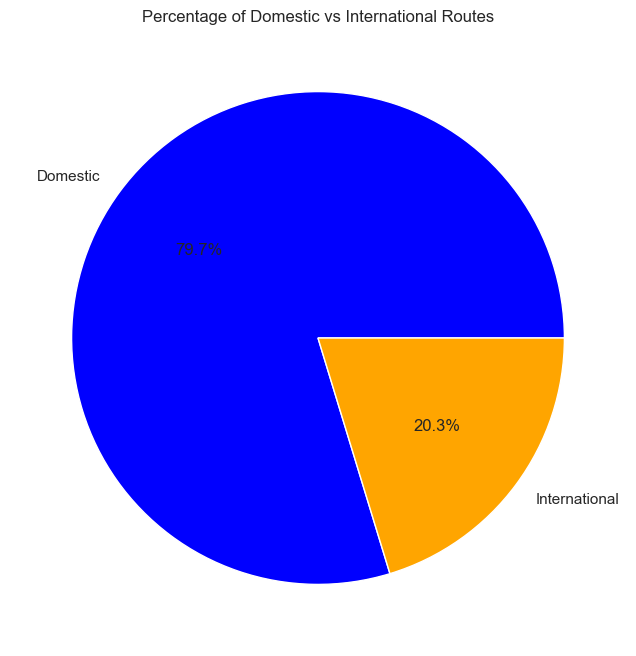

In [1344]:
# Pie chart for domestic and international routes
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Percentage of Domestic vs International Routes')
plt.show()

In [1345]:
nz_reviews_with_routes_df.columns

Index(['date', 'header', 'rating', 'aircraft', 'type_of_traveller',
       'seat_type', 'route', 'date_flown', 'seat_comfort',
       'cabin_staff_service', 'food_&_beverages', 'ground_service',
       'wifi_&_connectivity', 'value_for_money', 'recommended',
       'inflight_entertainment', 'verified_status', 'review_content',
       'textblob_sentiment', 'vader_sentiment', 'rating_sentiment', 'year',
       'departure', 'departure_country', 'arrival', 'arrival_country', 'via',
       'is_domestic'],
      dtype='object')

In [1346]:
# Inspect the dataset for missing values
nz_reviews_with_routes_df[rating_columns].isnull().sum()

# Check the distribution of domestic and international routes
nz_reviews_with_routes_df['is_domestic'].value_counts()


is_domestic
False    448
True     114
Name: count, dtype: int64

In [1347]:
# List of rating columns
rating_columns = ['seat_comfort', 'cabin_staff_service', 'food_&_beverages', 'ground_service',
                   'wifi_&_connectivity', 'value_for_money', 'inflight_entertainment']

# Calculate average ratings for each category by route type
average_ratings = nz_reviews_with_routes_df.groupby(['is_domestic'])[rating_columns].mean().reset_index()

# Display the average ratings
average_ratings

,is_domestic,seat_comfort,cabin_staff_service,food_&_beverages,ground_service,wifi_&_connectivity,value_for_money,inflight_entertainment
0,False,2.783482,2.997768,2.352679,2.774554,0.191964,2.747768,2.616071
1,True,2.605263,2.903509,1.210526,2.263158,-0.298246,2.377193,-0.105263


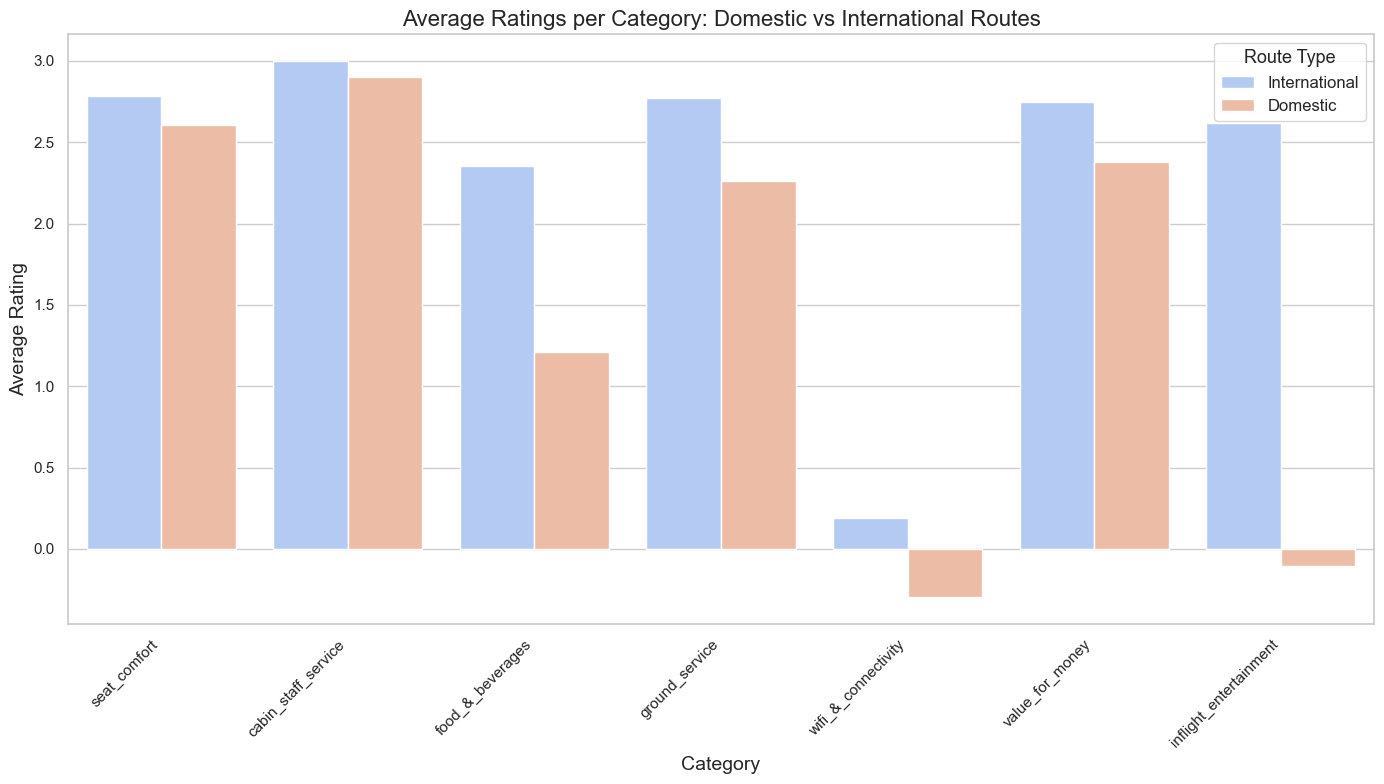

In [1348]:
# Melt the DataFrame to long format
average_ratings_melted = average_ratings.melt(id_vars=['is_domestic'], 
                                              value_vars=rating_columns,
                                              var_name='category', 
                                              value_name='average_rating')

plt.figure(figsize=(14, 8))

sns.barplot(data=average_ratings_melted, x='category', y='average_rating', hue='is_domestic', palette='coolwarm')

plt.title('Average Ratings per Category: Domestic vs International Routes', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45, ha='right')


handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Domestic' if label == 'True' else 'International' for label in labels]
plt.legend(handles=handles, labels=new_labels, title='Route Type', title_fontsize='13', fontsize='12')

plt.tight_layout()
plt.show()


In [1349]:
# Check average ratings for a specific category and route type
average_ratings.loc[average_ratings['is_domestic'] == 0, rating_columns]  # International
average_ratings.loc[average_ratings['is_domestic'] == 1, rating_columns]  # Domestic


,seat_comfort,cabin_staff_service,food_&_beverages,ground_service,wifi_&_connectivity,value_for_money,inflight_entertainment
1,2.605263,2.903509,1.210526,2.263158,-0.298246,2.377193,-0.105263


In [1350]:
nz_reviews_with_routes_df.to_csv("nz_reviews_with_routes.csv", index=False)
nz_reviews_with_routes_df

,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,textblob_sentiment,vader_sentiment,rating_sentiment,year,departure,departure_country,arrival,arrival_country,via,is_domestic
0,2024-09-15,Service was so good,10,NaN,Business,Economy Class,Melbourne to Tokyo,August 2024,5.0,5.0,...,Positive,Positive,Positive,2024,melbourne,AU,tokyo,JP,None,False
1,2024-09-12,a highly disappointing experience,4,NaN,Solo Leisure,Economy Class,Raratonga to Auckland via Taipei,August 2024,3.0,4.0,...,Negative,Negative,Neutral,2024,raratonga,None,auckland,NZ,Taipei,False
2,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,Positive,Positive,Positive,2024,auckland,NZ,queenstown,NZ,None,True
3,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,Negative,Negative,Negative,2024,auckland,NZ,napier,NZ,None,True
4,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,Negative,Negative,Negative,2024,napier,NZ,auckland,NZ,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,2015-07-14,Air New Zealand customer review,4,Boeing 777,Solo Leisure,Economy Class,London to Los Angeles,June 2015,1.0,2.0,...,Positive,Positive,Neutral,2015,london,US,los angeles,US,None,False
590,2015-07-03,Air New Zealand customer review,4,B777-300,Business,Economy Class,Auckland to LAX,June 2015,2.0,4.0,...,Positive,Positive,Neutral,2015,auckland,NZ,lax,US,None,False
591,2015-06-29,Air New Zealand customer review,10,Boeing 777-300,Solo Leisure,Business Class,Los Angeles to Auckland,June 2015,5.0,5.0,...,Positive,Positive,Positive,2015,los angeles,US,auckland,NZ,None,False
592,2015-06-26,Air New Zealand customer review,9,777-300,Business,Business Class,LAX to BNE via AKL,June 2015,5.0,5.0,...,Positive,Positive,Positive,2015,lax,US,bne,AU,AKL,False


# Do customer reviews improve over time?

In [1351]:
# Convert 'date' to datetime and extract the year
reviews_df['year'] = pd.to_datetime(nz_reviews_with_routes_df['date'], format='%Y-%m-%d').dt.year

# Number of reviews aggregated by year and sentiment
sentiment_by_year = reviews_df.groupby(['year', 'vader_sentiment']).size().unstack(fill_value=0)

sentiment_by_year

vader_sentiment,Negative,Neutral,Positive
year,,,
2015.0,11,2,31
2016.0,13,0,61
2017.0,17,2,51
2018.0,33,1,44
2019.0,45,1,35
2020.0,27,2,16
2021.0,15,1,9
2022.0,29,3,20
2023.0,39,1,28


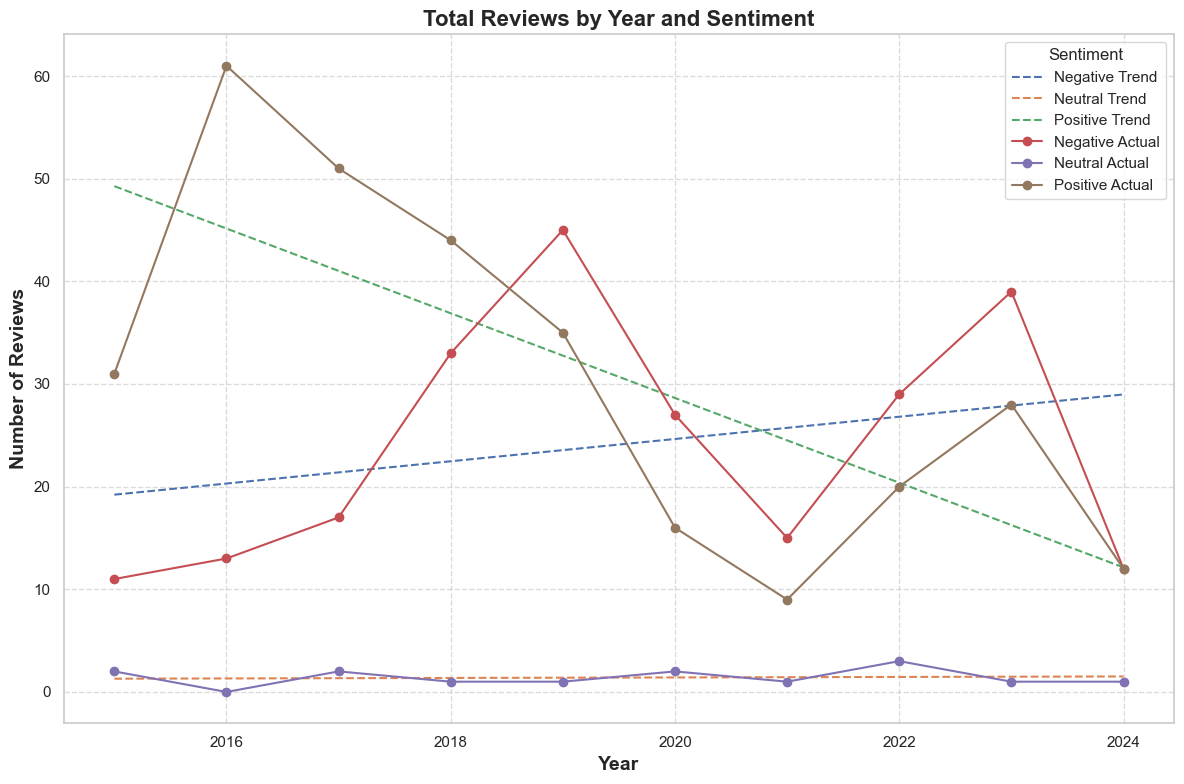

In [1352]:
from sklearn.linear_model import LinearRegression

# Convert years to a numpy array
years = sentiment_by_year.index.values.reshape(-1, 1)


plt.figure(figsize=(12, 8))

# Linear regression for each sentiment category
for sentiment in sentiment_by_year.columns:
    counts = sentiment_by_year[sentiment].values
    model = LinearRegression().fit(years, counts)
    trend_line = model.predict(years)
    plt.plot(years, trend_line, label=f'{sentiment} Trend', linestyle='--')

# Plot actual data
for sentiment in sentiment_by_year.columns:
    plt.plot(sentiment_by_year.index, sentiment_by_year[sentiment], marker='o', label=f'{sentiment} Actual')

plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=14, fontweight='bold')
plt.title('Total Reviews by Year and Sentiment', fontsize=16, fontweight='bold')
plt.legend(title='Sentiment')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# What key themes emerge from Air New Zealand's customer reviews across different sentiments?

In [1353]:
reviews_df = nz_reviews_with_routes_df
reviews_df.head()

,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,textblob_sentiment,vader_sentiment,rating_sentiment,year,departure,departure_country,arrival,arrival_country,via,is_domestic
0,2024-09-15,Service was so good,10,NaN,Business,Economy Class,Melbourne to Tokyo,August 2024,5.0,5.0,...,Positive,Positive,Positive,2024,melbourne,AU,tokyo,JP,None,False
1,2024-09-12,a highly disappointing experience,4,NaN,Solo Leisure,Economy Class,Raratonga to Auckland via Taipei,August 2024,3.0,4.0,...,Negative,Negative,Neutral,2024,raratonga,None,auckland,NZ,Taipei,False
2,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,Positive,Positive,Positive,2024,auckland,NZ,queenstown,NZ,None,True
3,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,Negative,Negative,Negative,2024,auckland,NZ,napier,NZ,None,True
4,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,Negative,Negative,Negative,2024,napier,NZ,auckland,NZ,None,True


In [1354]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from nltk.util import ngrams
import re

In [1355]:
# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [1356]:
# Common words to exclude from analysis
excluded_terms = ["air_new_zealand", "flight", "auckland", "christchurch", "wellington", 
                  "new", "zealand", "air", "nz", "even_though", "via", "av", "sec"]

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

# Function to generate exactly 3-word n-grams and join words with underscores
def generate_ngrams(text, n=3):
    words = text.split()
    # Generate only 4-word n-grams
    ngrams_list = ["_".join(ngram) for ngram in ngrams(words, n)]
    return ngrams_list


# Function to get top N n-grams while excluding certain terms
def get_top_n_ngrams(sentiment_reviews, n=20):
    all_ngrams = []
    for review in sentiment_reviews:
        all_ngrams.extend(generate_ngrams(review)) 
    
    # Remove excluded terms
    filtered_ngrams = [ngram for ngram in all_ngrams if all(term not in ngram for term in excluded_terms)]
    
    # Count frequencies of remaining n-grams
    ngram_freq = Counter(filtered_ngrams)
    return ngram_freq.most_common(n)

# Preprocess the reviews
reviews_df['cleaned_review'] = reviews_df['review_content'].apply(preprocess_text)


In [1357]:
# Get the top 10 n-grams for each sentiment
positive_reviews = reviews_df[reviews_df['vader_sentiment'] == 'Positive']['cleaned_review']
negative_reviews = reviews_df[reviews_df['vader_sentiment'] == 'Negative']['cleaned_review']
neutral_reviews = reviews_df[reviews_df['vader_sentiment'] == 'Neutral']['cleaned_review']

top_positive_ngrams = get_top_n_ngrams(positive_reviews, 20)
top_negative_ngrams = get_top_n_ngrams(negative_reviews, 20)
top_neutral_ngrams = get_top_n_ngrams(neutral_reviews, 5)


/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_926/3469339041.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frequencies), y=list(ngrams), palette='viridis')


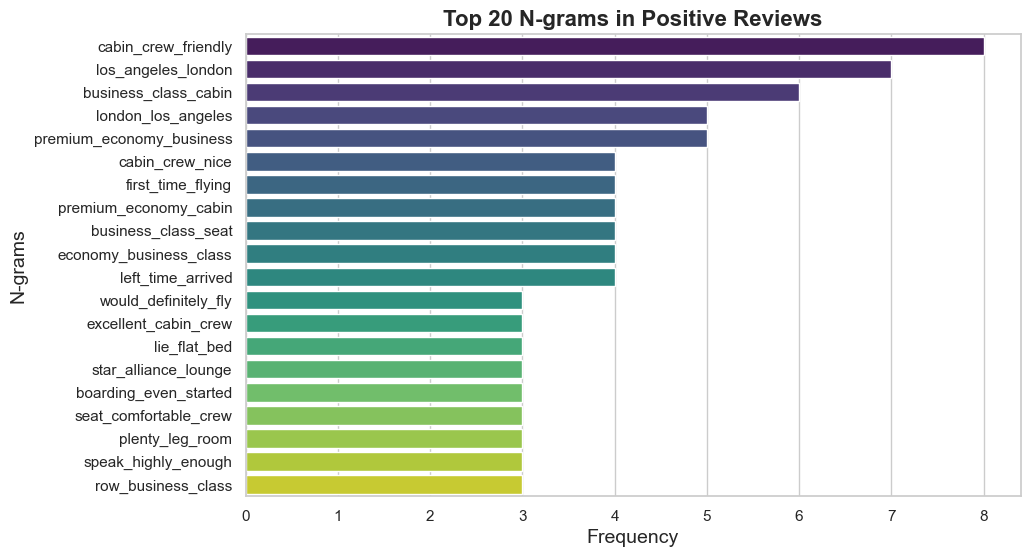

/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_926/3469339041.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frequencies), y=list(ngrams), palette='viridis')


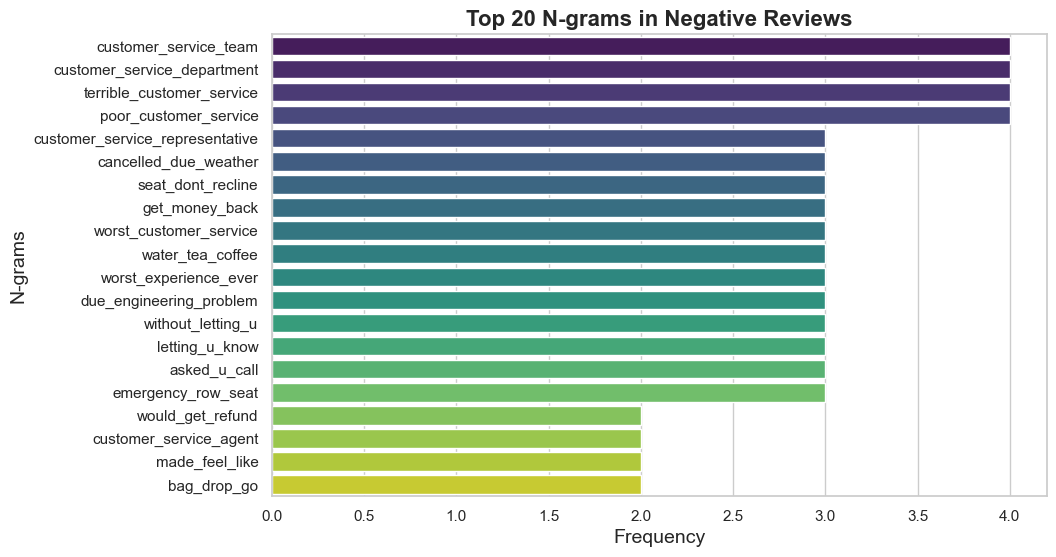

/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_926/3469339041.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frequencies), y=list(ngrams), palette='viridis')


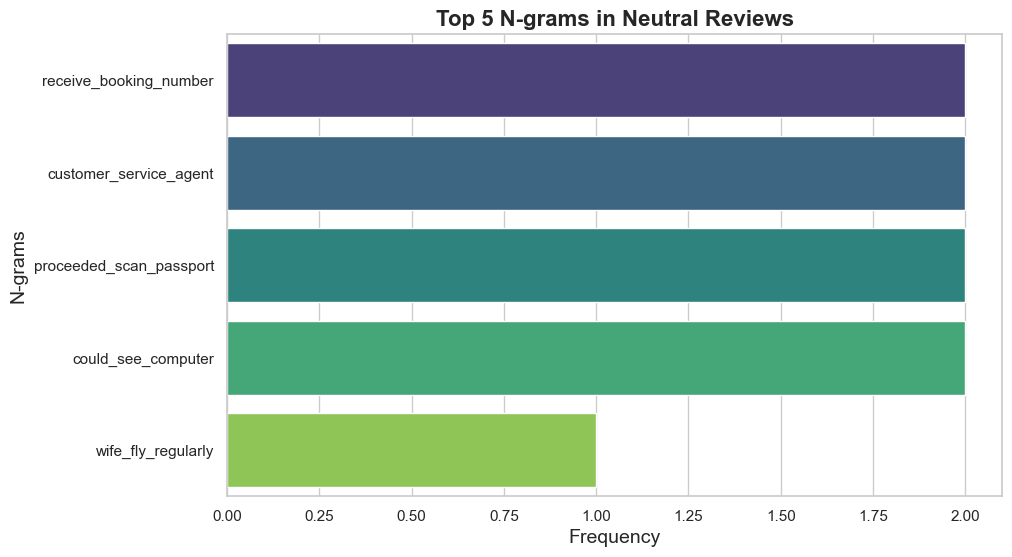

In [1358]:
# Function to plot the n-gram frequencies
def plot_ngram_frequencies(ngram_freq, title):
    ngrams, frequencies = zip(*ngram_freq)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(frequencies), y=list(ngrams), palette='viridis')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('N-grams', fontsize=14)
    plt.show()

# Plot the n-gram frequencies for each sentiment
plot_ngram_frequencies(top_positive_ngrams, 'Top 20 N-grams in Positive Reviews')
plot_ngram_frequencies(top_negative_ngrams, 'Top 20 N-grams in Negative Reviews')
plot_ngram_frequencies(top_neutral_ngrams, 'Top 5 N-grams in Neutral Reviews')

In [1359]:
from PIL import Image
from wordcloud import WordCloud


In [1360]:
# Load the airplane mask image
mask = np.array(Image.open('/Users/ainna/Documents/Coding Crusade with Ainna/air-new-zealand-customer-feedback-analysis/airplane-vector-36294843 copy.jpg'))

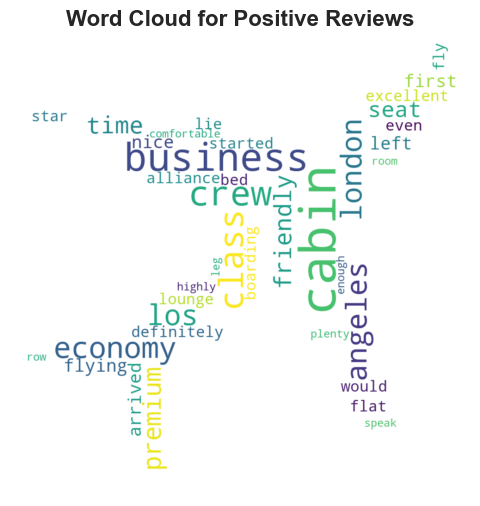

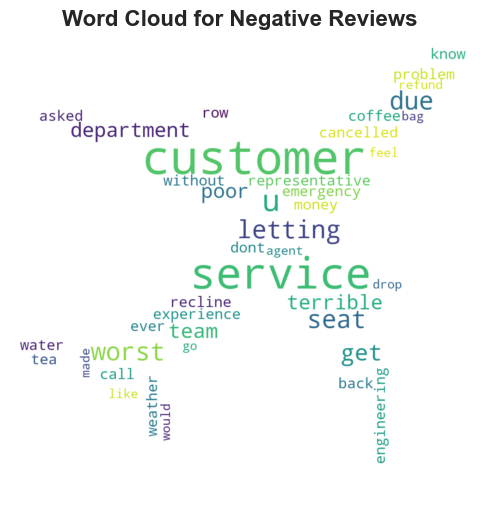

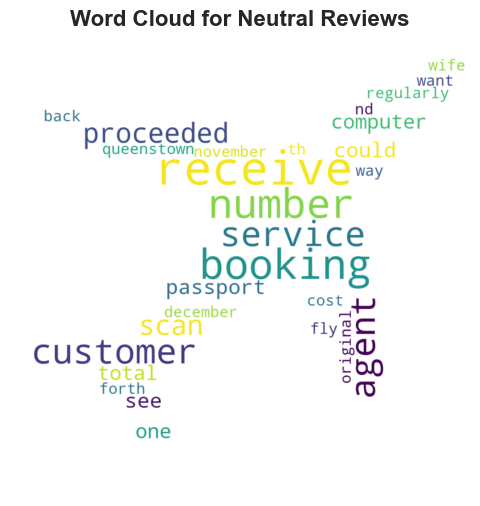

In [1361]:
def preprocess_ngrams(ngram_freq):
    # Split multi-word n-grams into individual words
    word_list = []
    for ngram, freq in ngram_freq.items():
        words = ngram.split('_')
        word_list.extend(words * freq)
    return Counter(word_list)

def plot_wordcloud(ngram_freq, title, mask):
    # Preprocess n-grams to individual words
    word_freq_dict = preprocess_ngrams(ngram_freq)
    
    # Create and generate the word cloud
    wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis', mask=mask).generate_from_frequencies(word_freq_dict)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.show()

# Get the top 20 n-grams for each sentiment
positive_reviews = reviews_df[reviews_df['vader_sentiment'] == 'Positive']['cleaned_review']
negative_reviews = reviews_df[reviews_df['vader_sentiment'] == 'Negative']['cleaned_review']
neutral_reviews = reviews_df[reviews_df['vader_sentiment'] == 'Neutral']['cleaned_review']

top_positive_ngrams = get_top_n_ngrams(positive_reviews, 20)
top_negative_ngrams = get_top_n_ngrams(negative_reviews, 20)
top_neutral_ngrams = get_top_n_ngrams(neutral_reviews, 10)



# Plot the word clouds for each sentiment
plot_wordcloud(dict(top_positive_ngrams), 'Word Cloud for Positive Reviews', mask)
plot_wordcloud(dict(top_negative_ngrams), 'Word Cloud for Negative Reviews', mask)
plot_wordcloud(dict(top_neutral_ngrams), 'Word Cloud for Neutral Reviews', mask)

# Which type of traveler gives the highest/lowest ratings?

In [1362]:
cleaned_reviews = "nz_reviews_with_routes.csv"
reviews_df = pd.read_csv(cleaned_reviews)

reviews_df.head()

,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,textblob_sentiment,vader_sentiment,rating_sentiment,year,departure,departure_country,arrival,arrival_country,via,is_domestic
0,2024-09-15,Service was so good,10,NaN,Business,Economy Class,Melbourne to Tokyo,August 2024,5.0,5.0,...,Positive,Positive,Positive,2024,melbourne,AU,tokyo,JP,NaN,False
1,2024-09-12,a highly disappointing experience,4,NaN,Solo Leisure,Economy Class,Raratonga to Auckland via Taipei,August 2024,3.0,4.0,...,Negative,Negative,Neutral,2024,raratonga,NaN,auckland,NZ,Taipei,False
2,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,Positive,Positive,Positive,2024,auckland,NZ,queenstown,NZ,NaN,True
3,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,Negative,Negative,Negative,2024,auckland,NZ,napier,NZ,NaN,True
4,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,Negative,Negative,Negative,2024,napier,NZ,auckland,NZ,NaN,True


In [1363]:
reviews_df.columns

Index(['date', 'header', 'rating', 'aircraft', 'type_of_traveller',
       'seat_type', 'route', 'date_flown', 'seat_comfort',
       'cabin_staff_service', 'food_&_beverages', 'ground_service',
       'wifi_&_connectivity', 'value_for_money', 'recommended',
       'inflight_entertainment', 'verified_status', 'review_content',
       'textblob_sentiment', 'vader_sentiment', 'rating_sentiment', 'year',
       'departure', 'departure_country', 'arrival', 'arrival_country', 'via',
       'is_domestic'],
      dtype='object')

In [1364]:
# Checking the unique types of travelers
reviews_df['type_of_traveller'].unique()

# Checking the distribution of ratings
reviews_df['rating'].describe()


count    562.000000
mean       4.807829
std        3.531182
min        1.000000
25%        1.000000
50%        4.000000
75%        9.000000
max       10.000000
Name: rating, dtype: float64

In [1365]:
# Grouping by type of traveller and calculating mean and median ratings
traveller_rating_summary = reviews_df.groupby('type_of_traveller')['rating'].agg(['mean', 'median', 'count']).reset_index()

# Sorting to find the highest and lowest mean ratings
traveller_rating_summary = traveller_rating_summary.sort_values(by='mean', ascending=False)
traveller_rating_summary


,type_of_traveller,mean,median,count
3,Solo Leisure,5.029851,4.0,201
1,Couple Leisure,4.901639,4.0,183
0,Business,4.694118,3.0,85
2,Family Leisure,4.247312,3.0,93


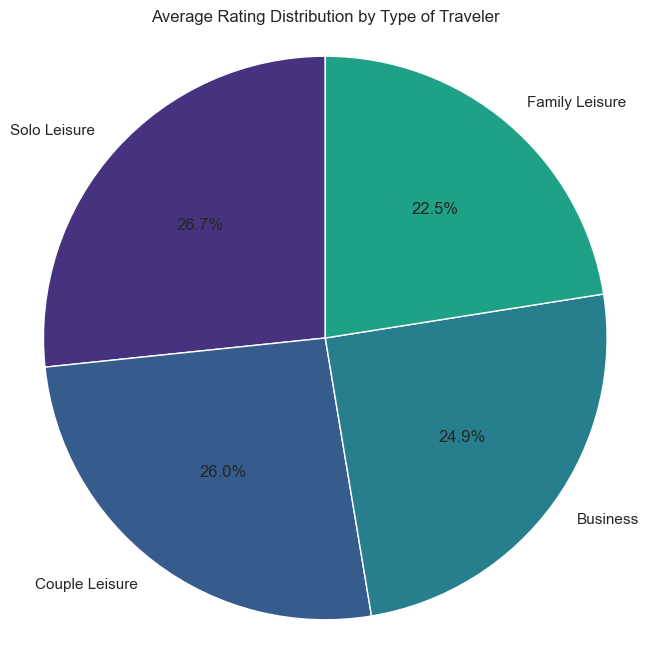

In [1366]:
labels = traveller_rating_summary['type_of_traveller']
average_ratings = traveller_rating_summary['mean']

plt.figure(figsize=(8, 8))
plt.pie(average_ratings, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis"))
plt.title('Average Rating Distribution by Type of Traveler')
plt.axis('equal')
plt.show()

In [1367]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [1368]:
reviews_df


,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,textblob_sentiment,vader_sentiment,rating_sentiment,year,departure,departure_country,arrival,arrival_country,via,is_domestic
0,2024-09-15,Service was so good,10,NaN,Business,Economy Class,Melbourne to Tokyo,August 2024,5.0,5.0,...,Positive,Positive,Positive,2024,melbourne,AU,tokyo,JP,NaN,False
1,2024-09-12,a highly disappointing experience,4,NaN,Solo Leisure,Economy Class,Raratonga to Auckland via Taipei,August 2024,3.0,4.0,...,Negative,Negative,Neutral,2024,raratonga,NaN,auckland,NZ,Taipei,False
2,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,Positive,Positive,Positive,2024,auckland,NZ,queenstown,NZ,NaN,True
3,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,Negative,Negative,Negative,2024,auckland,NZ,napier,NZ,NaN,True
4,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,Negative,Negative,Negative,2024,napier,NZ,auckland,NZ,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,2015-07-14,Air New Zealand customer review,4,Boeing 777,Solo Leisure,Economy Class,London to Los Angeles,June 2015,1.0,2.0,...,Positive,Positive,Neutral,2015,london,US,los angeles,US,NaN,False
558,2015-07-03,Air New Zealand customer review,4,B777-300,Business,Economy Class,Auckland to LAX,June 2015,2.0,4.0,...,Positive,Positive,Neutral,2015,auckland,NZ,lax,US,NaN,False
559,2015-06-29,Air New Zealand customer review,10,Boeing 777-300,Solo Leisure,Business Class,Los Angeles to Auckland,June 2015,5.0,5.0,...,Positive,Positive,Positive,2015,los angeles,US,auckland,NZ,NaN,False
560,2015-06-26,Air New Zealand customer review,9,777-300,Business,Business Class,LAX to BNE via AKL,June 2015,5.0,5.0,...,Positive,Positive,Positive,2015,lax,US,bne,AU,AKL,False


In [1369]:
# Group by type of traveler and sentiment label
sentiment_distribution = reviews_df.groupby(['type_of_traveller', 'vader_sentiment']).size().unstack(fill_value=0)

# Normalize to get percentage distribution
sentiment_distribution_percentage = sentiment_distribution.div(sentiment_distribution.sum(axis=1), axis=0)

# Display the sentiment distribution as a percentage
sentiment_distribution_percentage


vader_sentiment,Negative,Neutral,Positive
type_of_traveller,,,
Business,0.400000,0.011765,0.588235
Couple Leisure,0.453552,0.027322,0.519126
Family Leisure,0.526882,0.021505,0.451613
Solo Leisure,0.412935,0.019900,0.567164


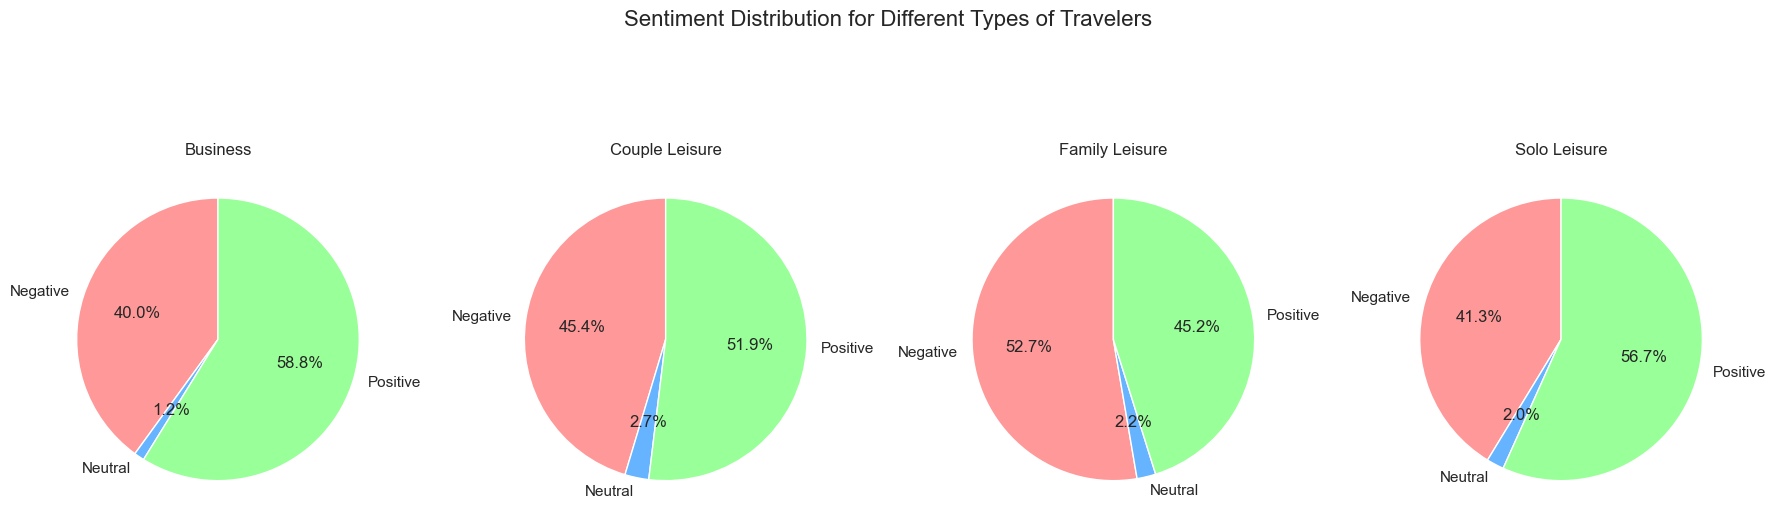

In [1370]:
traveller_types = sentiment_distribution.index

fig, axes = plt.subplots(1, len(traveller_types), figsize=(18, 6))

colors = ['#ff9999','#66b3ff','#99ff99']

# Iterate through each type of traveler and create a pie chart
for i, traveller_type in enumerate(traveller_types):
    sentiments = sentiment_distribution.loc[traveller_type]
    
    axes[i].pie(sentiments, labels=sentiments.index, autopct='%1.1f%%', startangle=90, colors=colors)
    
    axes[i].set_title(traveller_type)

plt.tight_layout()
plt.suptitle('Sentiment Distribution for Different Types of Travelers', y=1.05, fontsize=16)
plt.show()


# How do ratings vary by Seat Type (e.g. Economy, Business)?

In [1371]:
# Group by seat type and calculate rating statistics
seat_rating_summary = reviews_df.groupby('seat_type')['rating'].agg(['mean', 'median', 'count']).reset_index()

# Sort the values to see which seat types have the highest/lowest ratings
seat_rating_summary = seat_rating_summary.sort_values(by='mean', ascending=False)

# Display the summary
seat_rating_summary


,seat_type,mean,median,count
0,Business Class,6.697674,8.0,86
2,Premium Economy,5.957447,8.0,47
1,Economy Class,4.303030,3.0,429


/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_926/768762854.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seat_type', y='mean', data=seat_rating_summary, palette='coolwarm')


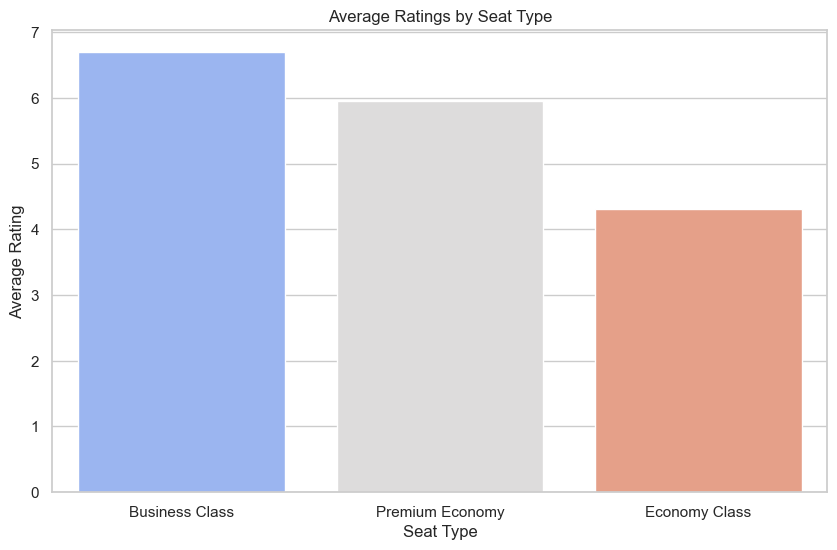

In [1372]:
# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a bar plot to visualize the mean ratings by seat type
sns.barplot(x='seat_type', y='mean', data=seat_rating_summary, palette='coolwarm')

# Add labels and title
plt.title('Average Ratings by Seat Type')
plt.xlabel('Seat Type')
plt.ylabel('Average Rating')

# Display the plot
plt.show()


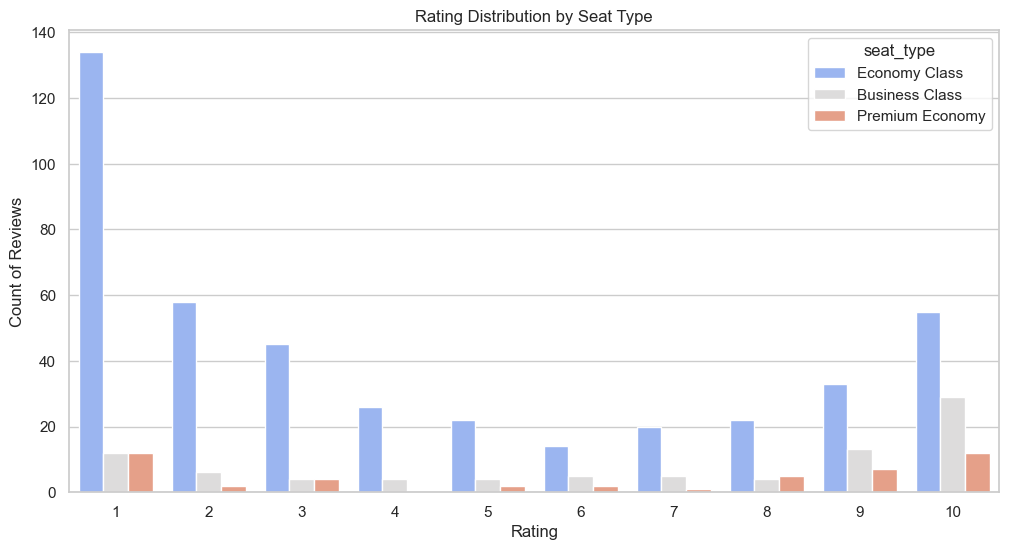

In [1373]:
# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create a count plot to visualize the number of reviews for each rating per seat type
sns.countplot(x='rating', hue='seat_type', data=reviews_df, palette='coolwarm')

# Add labels and title
plt.title('Rating Distribution by Seat Type')
plt.xlabel('Rating') 
plt.ylabel('Count of Reviews')

# Display the plot
plt.show()


In [1374]:
# List of rating columns excluding 'wifi_&_connectivity'
rating_columns = ['seat_comfort', 'cabin_staff_service', 'food_&_beverages', 'ground_service', 'value_for_money', 'wifi_&_connectivity', 'inflight_entertainment']

In [1375]:
# Group by seat type and calculate the mean ratings for the selected columns
category_rating_summary = reviews_df.groupby('seat_type')[rating_columns].mean().reset_index()

# Display the summary
category_rating_summary


,seat_type,seat_comfort,cabin_staff_service,food_&_beverages,ground_service,value_for_money,wifi_&_connectivity,inflight_entertainment
0,Business Class,3.616279,4.058140,3.593023,3.290698,3.430233,0.255814,3.255814
1,Economy Class,2.508159,2.715618,1.734266,2.470862,2.456876,0.041958,1.720280
2,Premium Economy,3.340426,3.404255,2.957447,3.361702,3.255319,0.255319,3.021277


/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_926/2884457515.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seat_type', y=column, data=reviews_df, palette='coolwarm')
/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_926/2884457515.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seat_type', y=column, data=reviews_df, palette='coolwarm')
/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_926/2884457515.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seat_type', y=column, data=reviews_df, pal

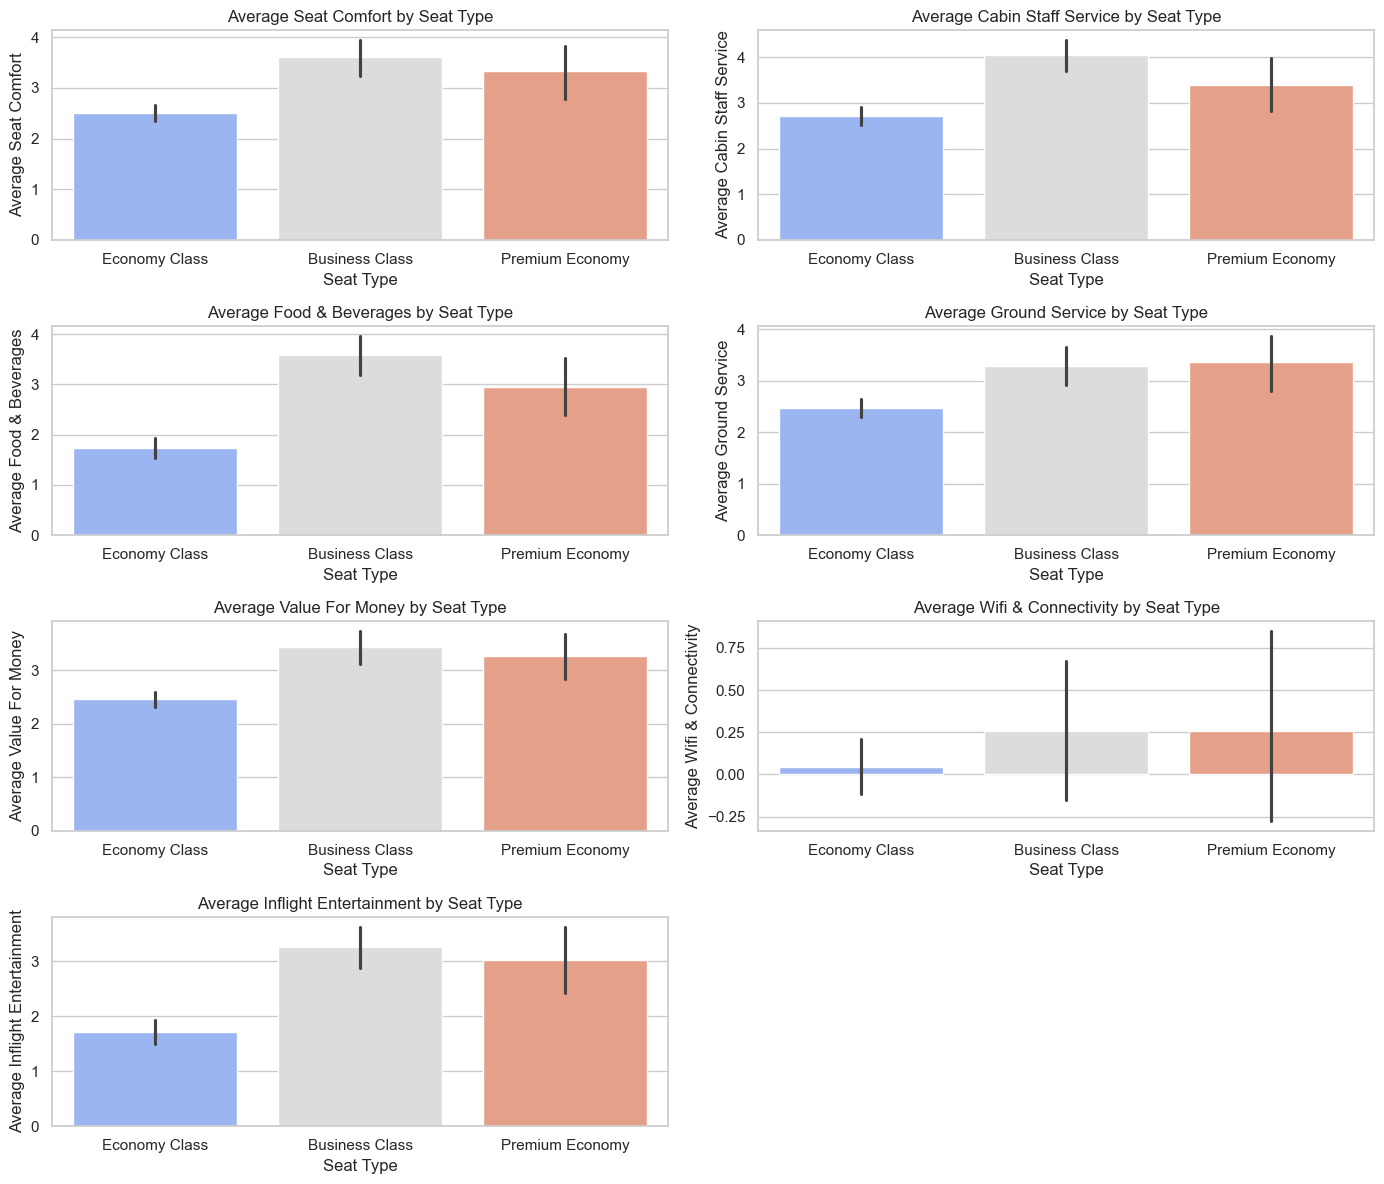

In [1376]:
# Set the figure size for better readability
plt.figure(figsize=(14, 12))  # Adjusted size to fit all subplots

# Loop through each rating column and create a subplot
for i, column in enumerate(rating_columns):
    plt.subplot(4, 2, i+1)  # Create a 4x2 grid for subplots
    
    # Create a bar plot for the current category
    sns.barplot(x='seat_type', y=column, data=reviews_df, palette='coolwarm')
    
    # Add title and labels
    plt.title(f'Average {column.replace("_", " ").title()} by Seat Type')
    plt.xlabel('Seat Type')
    plt.ylabel(f'Average {column.replace("_", " ").title()}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()